# Library Imports

In [ ]:
!pip install kneed

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
import seaborn as sns
%matplotlib inline
import datetime
from sklearn.linear_model import LogisticRegression
#from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import cycle
from time import time
from scipy.stats import loguniform
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix
#from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

# Data Importing

In [ ]:
# to access datasets
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# upload relevant data
from google.colab import files
uploaded = files.upload()

In [ ]:
# main Fingerhut data
df = pd.read_csv("export.csv")

# event definitions
ed = pd.read_csv("Event Definitions.csv")

In [ ]:
# preview dataset
df.head()

,customer_id,account_id,ed_id,event_name,event_timestamp,journey_steps_until_end
0,-784961211,1773350293,12,application_web_approved,2023-03-22T08:45:22.000Z,1
1,-784961211,1773350293,19,application_web_view,2023-03-22T13:32:10.000Z,2
2,-784961211,1773350293,19,application_web_view,2023-03-22T13:32:10.000Z,3
3,-784961211,1773350293,19,application_web_view,2023-03-22T13:32:10.000Z,4
4,-784961211,1773350293,19,application_web_view,2023-03-22T13:32:10.000Z,5


In [ ]:
#df.head()

In [ ]:
ed

,event_name,journey_id,event_definition_id,milestone_number,stage
0,application_phone_approved,1,15,1.0,Apply for Credit
1,application_phone_declined,1,16,NaN,Apply for Credit
2,application_phone_pending,1,17,NaN,Apply for Credit
3,application_web_approved,1,12,1.0,Apply for Credit
4,application_web_declined,1,13,NaN,Apply for Credit
5,application_web_pending,1,14,NaN,Apply for Credit
6,application_web_submit,1,3,NaN,Apply for Credit
7,application_web_view,1,19,NaN,Apply for Credit
8,account_activitation,1,29,3.0,Credit Account
9,account_fraud_review,1,37,NaN,Credit Account


# Question 1 (Chris)

# Preliminary Library Loading

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
import seaborn as sns
%matplotlib inline
import datetime
#from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import cycle
from time import time
from scipy.stats import loguniform
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
import json
import re
import ast
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from collections import Counter
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from sklearn.utils.class_weight import compute_class_weight
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFECV
from sklearn.pipeline import Pipeline
import pickle
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
import multiprocessing

ModuleNotFoundError: No module named 'kneed'

# EDA

In [ ]:
df = pd.read_csv("export.csv")

In [ ]:
# event definitions
ed = pd.read_csv("Event Definitions.csv")

In [ ]:
df.head()

,customer_id,account_id,ed_id,event_name,event_timestamp,journey_steps_until_end
0,-784961211,1773350293,12,application_web_approved,2023-03-22T08:45:22.000Z,1
1,-784961211,1773350293,19,application_web_view,2023-03-22T13:32:10.000Z,2
2,-784961211,1773350293,19,application_web_view,2023-03-22T13:32:10.000Z,3
3,-784961211,1773350293,19,application_web_view,2023-03-22T13:32:10.000Z,4
4,-784961211,1773350293,19,application_web_view,2023-03-22T13:32:10.000Z,5


In [ ]:
df["event_name"].unique()

array(['application_web_approved', 'application_web_view',
       'application_web_submit', 'campaign_click', 'browse_products',
       'add_to_cart', 'view_cart', 'promotion_created',
       'campaignemail_clicked', 'begin_checkout', 'place_order_phone',
       'account_activitation', 'account_downpaymentcleared',
       'order_shipped', 'application_web_declined', 'place_order_web',
       'application_phone_approved', 'account_downpaymentreceived',
       'place_downpayment', 'catalog_(mail)', 'site_registration',
       'pre-application_(3rd_party_affiliates)',
       'application_phone_declined', 'fingerhut_university',
       'catalog_(email)_(experian)', 'application_web_pending',
       'customer_requested_catalog_(digital)',
       'application_phone_pending'], dtype=object)

In [ ]:
ed

,event_name,journey_id,event_definition_id,milestone_number,stage
0,application_phone_approved,1,15,1.0,Apply for Credit
1,application_phone_declined,1,16,NaN,Apply for Credit
2,application_phone_pending,1,17,NaN,Apply for Credit
3,application_web_approved,1,12,1.0,Apply for Credit
4,application_web_declined,1,13,NaN,Apply for Credit
5,application_web_pending,1,14,NaN,Apply for Credit
6,application_web_submit,1,3,NaN,Apply for Credit
7,application_web_view,1,19,NaN,Apply for Credit
8,account_activitation,1,29,3.0,Credit Account
9,account_fraud_review,1,37,NaN,Credit Account


In [ ]:
year_2023 = df[df["event_timestamp"].str[:4] == "2023"]
year_2022 = df[df["event_timestamp"].str[:4] == "2022"]
year_2021 = df[df["event_timestamp"].str[:4] == "2021"]

In [ ]:
month_day_2023 = year_2023["event_timestamp"].str[5:10]
month_day_2022 = year_2022["event_timestamp"].str[5:10]
month_day_2021 = year_2021["event_timestamp"].str[5:10]

In [ ]:
month_day_2023 = pd.DataFrame(month_day_2023)
new_month_day_2023 = pd.to_datetime(month_day_2023["event_timestamp"], format='%m-%d').dt.isocalendar().week
year_2023["week_num"] = new_month_day_2023

month_day_2022 = pd.DataFrame(month_day_2022)
new_month_day_2022 = pd.to_datetime(month_day_2022["event_timestamp"], format='%m-%d').dt.isocalendar().week
year_2022["week_num"] = new_month_day_2022

month_day_2021 = pd.DataFrame(month_day_2021)
new_month_day_2021 = pd.to_datetime(month_day_2021["event_timestamp"], format='%m-%d').dt.isocalendar().week
year_2021["week_num"] = new_month_day_2021

/var/folders/x8/_2v65kgx1zxc0k4y6d9hts5h0000gn/T/ipykernel_94417/545539477.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_2023["week_num"] = new_month_day_2023
/var/folders/x8/_2v65kgx1zxc0k4y6d9hts5h0000gn/T/ipykernel_94417/545539477.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_2022["week_num"] = new_month_day_2022
/var/folders/x8/_2v65kgx1zxc0k4y6d9hts5h0000gn/T/ipykernel_94417/545539477.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [ ]:
# preview
year_2023.head()

,customer_id,account_id,ed_id,event_name,event_timestamp,journey_steps_until_end,week_num
0,-784961211,1773350293,12,application_web_approved,2023-03-22T08:45:22.000Z,1,12
1,-784961211,1773350293,19,application_web_view,2023-03-22T13:32:10.000Z,2,12
2,-784961211,1773350293,19,application_web_view,2023-03-22T13:32:10.000Z,3,12
3,-784961211,1773350293,19,application_web_view,2023-03-22T13:32:10.000Z,4,12
4,-784961211,1773350293,19,application_web_view,2023-03-22T13:32:10.000Z,5,12


In [ ]:
# create new column for year-month timestamp
df["Year-Month"] = df["event_timestamp"].str[:7]
df.head()

,customer_id,account_id,ed_id,event_name,event_timestamp,journey_steps_until_end,Year-Month
0,-784961211,1773350293,12,application_web_approved,2023-03-22T08:45:22.000Z,1,2023-03
1,-784961211,1773350293,19,application_web_view,2023-03-22T13:32:10.000Z,2,2023-03
2,-784961211,1773350293,19,application_web_view,2023-03-22T13:32:10.000Z,3,2023-03
3,-784961211,1773350293,19,application_web_view,2023-03-22T13:32:10.000Z,4,2023-03
4,-784961211,1773350293,19,application_web_view,2023-03-22T13:32:10.000Z,5,2023-03


In [ ]:
# Liao Han's graph
# # unique acct IDs vs Year-Month, grouped by event_name
# index data with only those columns
mask = ["account_id", "event_name", "Year-Month"]

LH_df = df[mask]

LH_df.head()

,account_id,event_name,Year-Month
0,1773350293,application_web_approved,2023-03
1,1773350293,application_web_view,2023-03
2,1773350293,application_web_view,2023-03
3,1773350293,application_web_view,2023-03
4,1773350293,application_web_view,2023-03


In [ ]:
# count # unique accounts for each event at each year-month
LH_df_sub = LH_df.groupby(["event_name", "Year-Month"]).agg({"account_id": "nunique"}).reset_index()

In [ ]:
LH_df_sub.head()

,event_name,Year-Month,account_id
0,account_activitation,2020-11,2
1,account_activitation,2020-12,5
2,account_activitation,2021-01,12040
3,account_activitation,2021-02,15653
4,account_activitation,2021-03,24576


In [ ]:
LH_df_sub.sort_values(by = "account_id", ascending = False)

,event_name,Year-Month,account_id
748,promotion_created,2022-02,499187
749,promotion_created,2022-03,369152
509,catalog_(mail),2022-02,316963
751,promotion_created,2022-05,305518
744,promotion_created,2021-10,273634
...,...,...,...
169,application_phone_declined,2020-11,1
531,fingerhut_university,2021-01,1
540,fingerhut_university,2021-10,1
536,fingerhut_university,2021-06,1


In [ ]:
ax = sns.lineplot(data = LH_df_sub,
            x = "Year-Month",
            y = "account_id",
            hue = "event_name",
            )

fig = ax.get_figure()

In [ ]:
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1),
                title = "Event")

In [ ]:
fig.suptitle("# of Unique Accounts Against Time, Grouped by Event")

Text(0.5, 0.98, '# of Unique Accounts Against Time, Grouped by Event')

In [ ]:
ax.set_xlabel('Year-Month')
ax.set_ylabel('# of Unique Accts')

Text(18.106250000000003, 0.5, '# of Unique Accts')

In [ ]:
ax.tick_params(axis='x', rotation=90)

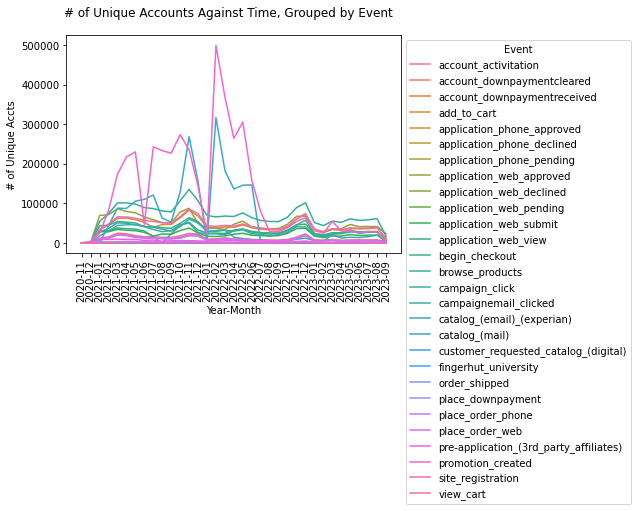

In [ ]:
fig

As we observe from above, these are the **Number of UNIQUE accounts** for each event over the timeframe of the dataset. Let's bind our results to the Event Definitions dataframe so we can investigate milestone number, stages, etc.

In [ ]:
# join on event_name
big1 = pd.merge(LH_df_sub, ed, how="left", on="event_name")

In [ ]:
big1

,event_name,Year-Month,account_id,journey_id,event_definition_id,milestone_number,stage
0,account_activitation,2020-11,2,1.0,29.0,3.0,Credit Account
1,account_activitation,2020-12,5,1.0,29.0,3.0,Credit Account
2,account_activitation,2021-01,12040,1.0,29.0,3.0,Credit Account
3,account_activitation,2021-02,15653,1.0,29.0,3.0,Credit Account
4,account_activitation,2021-03,24576,1.0,29.0,3.0,Credit Account
...,...,...,...,...,...,...,...
833,view_cart,2023-05,38028,1.0,5.0,NaN,First Purchase
834,view_cart,2023-06,37337,1.0,5.0,NaN,First Purchase
835,view_cart,2023-07,37701,1.0,5.0,NaN,First Purchase
836,view_cart,2023-08,39977,1.0,5.0,NaN,First Purchase


In [ ]:
# plot # unique accts vs year-month, grouped by stage
ax2 = sns.lineplot(data = big1,
            x = "Year-Month",
            y = "account_id",
            hue = "stage",
            )

fig2 = ax2.get_figure()

In [ ]:
sns.move_legend(ax2, "upper left", bbox_to_anchor=(1, 1),
                title = "Stage")

In [ ]:
fig2.suptitle("# of Unique Accounts Against Time, Grouped by Stage")

Text(0.5, 0.98, '# of Unique Accounts Against Time, Grouped by Stage')

In [ ]:
ax2.set_xlabel('Year-Month')
ax2.set_ylabel('# of Unique Accts')

Text(18.106250000000003, 0.5, '# of Unique Accts')

In [ ]:
ax2.tick_params(axis='x', rotation=90)

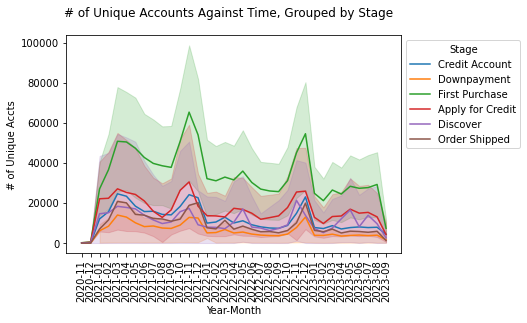

In [ ]:
fig2

# Work on TINY dataset

In [ ]:
s = pd.read_csv("verysmall.csv")

In [ ]:
s.head()

,customer_id,account_id,stage,ed_id,event_name,event_timestamp,journey_steps_until_end,journey_id,milestone_number
0,-1759331265,373053416,Apply for Credit,19,application_web_view,2022-11-02 00:40:33,1,1.0,NaN
1,-1759331265,373053416,Apply for Credit,19,application_web_view,2022-11-02 00:40:33,2,1.0,NaN
2,-1759331265,373053416,Apply for Credit,19,application_web_view,2022-11-02 00:40:33,3,1.0,NaN
3,-1759331265,373053416,Apply for Credit,19,application_web_view,2022-11-02 00:40:33,4,1.0,NaN
4,-1759331265,373053416,Apply for Credit,19,application_web_view,2022-11-02 00:41:10,5,1.0,NaN


In [ ]:
s.shape

(346, 9)

In [ ]:
# main dataset mask
#mask = ["account_id", "event_name"]

# smaller dataset mask
mask = ["account_id", "event_name", "journey_id", "milestone_number", "event_timestamp"]

new_df = s.drop(mask, axis = 1)
new_df.head()

,customer_id,stage,ed_id,journey_steps_until_end
0,-1759331265,Apply for Credit,19,1
1,-1759331265,Apply for Credit,19,2
2,-1759331265,Apply for Credit,19,3
3,-1759331265,Apply for Credit,19,4
4,-1759331265,Apply for Credit,19,5


In [ ]:
# group customer with their events and journey steps (sort by journey order)
new_df.groupby(["customer_id"]).head()

,customer_id,stage,ed_id,journey_steps_until_end
0,-1759331265,Apply for Credit,19,1
1,-1759331265,Apply for Credit,19,2
2,-1759331265,Apply for Credit,19,3
3,-1759331265,Apply for Credit,19,4
4,-1759331265,Apply for Credit,19,5
18,-148843671,Apply for Credit,19,1
19,-148843671,Apply for Credit,19,2
20,-148843671,Apply for Credit,3,3
21,-148843671,Apply for Credit,19,4
22,-148843671,Apply for Credit,19,5


In [ ]:
# COLLAPSE ED_ID INTO A LIST —> THE JOURNEY PATH
journey = new_df.groupby('customer_id')['ed_id', 'stage'].agg(list).reset_index()
journey = journey.rename(columns = {"ed_id": "journey"})
journey # this is assuming the journey paths are sorted

/var/folders/x8/_2v65kgx1zxc0k4y6d9hts5h0000gn/T/ipykernel_14989/1645833335.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  journey = new_df.groupby('customer_id')['ed_id', 'stage'].agg(list).reset_index()


,customer_id,journey,stage
0,-2142274997,"[21, 12, 2, 4]","[nan, Apply for Credit, Discover, First Purchase]"
1,-1759331265,"[19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 1...","[Apply for Credit, Apply for Credit, Apply for..."
2,-1601586042,"[19, 19, 19, 3, 19, 12, 19, 23, 4, 11, 5, 6, 5...","[Apply for Credit, Apply for Credit, Apply for..."
3,-1533741603,"[6, 19, 19, 19, 19, 19, 3, 12, 19, 4, 11, 5, 6...","[First Purchase, Apply for Credit, Apply for C..."
4,-910693447,"[12, 4, 11, 5, 5, 6, 5, 1, 1, 2, 5, 5, 4, 4, 5...","[Apply for Credit, First Purchase, First Purch..."
5,-850705597,"[12, 1, 21, 1, 1, 21, 1, 1, 1, 21]","[Apply for Credit, nan, nan, nan, nan, nan, na..."
6,-309338388,"[2, 4, 11, 4, 4, 11, 5, 6, 19, 19, 19, 19, 19,...","[Discover, First Purchase, First Purchase, Fir..."
7,-148843671,"[19, 19, 3, 19, 19, 12, 19, 1, 1, 24, 1, 4, 11...","[Apply for Credit, Apply for Credit, Apply for..."
8,857705465,"[2, 22, 12, 19, 24, 21, 1, 1, 1, 1, 1, 1]","[Discover, nan, Apply for Credit, Apply for Cr..."
9,1085299248,"[2, 12, 1, 1, 5, 5, 5, 5, 4, 4, 4, 6, 11, 11, ...","[Discover, Apply for Credit, nan, nan, First P..."


e.g. customer -2142274997

- path: 21, 12, 2, 4

- journey: prospecting, apply for credit, discover, first purchase

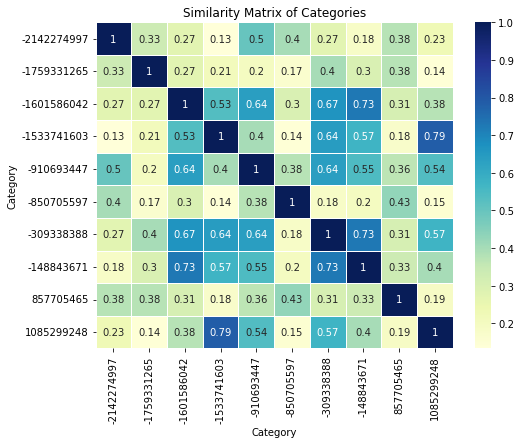

In [ ]:
# heat matrix
similarity_matrix = pd.DataFrame(index=journey["customer_id"], columns=journey['customer_id'])

for i, row_i in journey.iterrows():
    for j, row_j in journey.iterrows():
        category_i = row_i['customer_id']
        category_j = row_j['customer_id']
        values_i = set(row_i['journey'])
        values_j = set(row_j['journey'])
        similarity = len(values_i.intersection(values_j)) / len(values_i.union(values_j))
        similarity_matrix.at[category_i, category_j] = similarity

# Convert similarity values to float
similarity_matrix = similarity_matrix.astype(float)

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(similarity_matrix, annot=True, cmap="YlGnBu", linewidths=.5)
plt.title('Similarity Matrix of Categories')
plt.xlabel('Category')
plt.ylabel('Category')
plt.show()

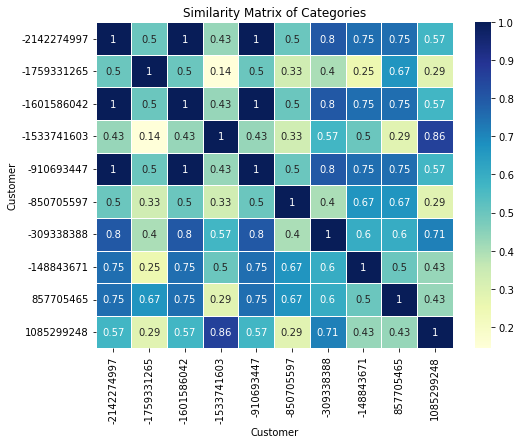

In [ ]:
# heat matrix
similarity_matrix = pd.DataFrame(index=journey["customer_id"], columns=journey['customer_id'])

for i, row_i in journey.iterrows():
    for j, row_j in journey.iterrows():
        category_i = row_i['customer_id']
        category_j = row_j['customer_id']
        values_i = set(row_i['stage'])
        values_j = set(row_j['stage'])
        similarity = len(values_i.intersection(values_j)) / len(values_i.union(values_j))
        similarity_matrix.at[category_i, category_j] = similarity

# Convert similarity values to float
similarity_matrix = similarity_matrix.astype(float)

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(similarity_matrix, annot=True, cmap="YlGnBu", linewidths=.5)
plt.title('Similarity Matrix of Categories')
plt.xlabel('Customer')
plt.ylabel('Customer')
plt.show()

# What stages are being met?

In [ ]:
# main dataset mask
#mask = ["account_id", "event_name"]

# smaller dataset mask
mask = ["account_id", "event_name", "journey_id", "milestone_number", "event_timestamp"]

new_df = s.drop(mask, axis = 1)
new_df.head()

,customer_id,stage,ed_id,journey_steps_until_end
0,-1759331265,Apply for Credit,19,1
1,-1759331265,Apply for Credit,19,2
2,-1759331265,Apply for Credit,19,3
3,-1759331265,Apply for Credit,19,4
4,-1759331265,Apply for Credit,19,5


In [ ]:
# group customer with their events and journey steps (sort by journey order)
new_df.groupby(["customer_id"]).head()

,customer_id,stage,ed_id,journey_steps_until_end
0,-1759331265,Apply for Credit,19,1
1,-1759331265,Apply for Credit,19,2
2,-1759331265,Apply for Credit,19,3
3,-1759331265,Apply for Credit,19,4
4,-1759331265,Apply for Credit,19,5
18,-148843671,Apply for Credit,19,1
19,-148843671,Apply for Credit,19,2
20,-148843671,Apply for Credit,3,3
21,-148843671,Apply for Credit,19,4
22,-148843671,Apply for Credit,19,5


In [ ]:
# COLLAPSE ED_ID INTO A LIST —> THE JOURNEY PATH
journey = new_df.groupby('customer_id')['ed_id', 'stage'].agg(list).reset_index()
journey = journey.rename(columns = {"ed_id": "journey"})
journey # this is assuming the journey paths are sorted

/var/folders/x8/_2v65kgx1zxc0k4y6d9hts5h0000gn/T/ipykernel_33085/1645833335.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  journey = new_df.groupby('customer_id')['ed_id', 'stage'].agg(list).reset_index()


,customer_id,journey,stage
0,-2142274997,"[21, 12, 2, 4]","[nan, Apply for Credit, Discover, First Purchase]"
1,-1759331265,"[19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 1...","[Apply for Credit, Apply for Credit, Apply for..."
2,-1601586042,"[19, 19, 19, 3, 19, 12, 19, 23, 4, 11, 5, 6, 5...","[Apply for Credit, Apply for Credit, Apply for..."
3,-1533741603,"[6, 19, 19, 19, 19, 19, 3, 12, 19, 4, 11, 5, 6...","[First Purchase, Apply for Credit, Apply for C..."
4,-910693447,"[12, 4, 11, 5, 5, 6, 5, 1, 1, 2, 5, 5, 4, 4, 5...","[Apply for Credit, First Purchase, First Purch..."
5,-850705597,"[12, 1, 21, 1, 1, 21, 1, 1, 1, 21]","[Apply for Credit, nan, nan, nan, nan, nan, na..."
6,-309338388,"[2, 4, 11, 4, 4, 11, 5, 6, 19, 19, 19, 19, 19,...","[Discover, First Purchase, First Purchase, Fir..."
7,-148843671,"[19, 19, 3, 19, 19, 12, 19, 1, 1, 24, 1, 4, 11...","[Apply for Credit, Apply for Credit, Apply for..."
8,857705465,"[2, 22, 12, 19, 24, 21, 1, 1, 1, 1, 1, 1]","[Discover, nan, Apply for Credit, Apply for Cr..."
9,1085299248,"[2, 12, 1, 1, 5, 5, 5, 5, 4, 4, 4, 6, 11, 11, ...","[Discover, Apply for Credit, nan, nan, First P..."


In [ ]:
new_df

,customer_id,stage,ed_id,journey_steps_until_end
0,-1759331265,Apply for Credit,19,1
1,-1759331265,Apply for Credit,19,2
2,-1759331265,Apply for Credit,19,3
3,-1759331265,Apply for Credit,19,4
4,-1759331265,Apply for Credit,19,5
...,...,...,...,...
341,-850705597,NaN,21,6
342,-850705597,NaN,1,7
343,-850705597,NaN,1,8
344,-850705597,NaN,1,9


In [ ]:
test = pd.merge(new_df, ed, how = "left", on = "ed_id")
test = test.rename(columns = {"stage_y": "stage"}) # stage on FAR RIGHT is true stage
test

,customer_id,stage_x,ed_id,journey_steps_until_end,event_name,journey_id,milestone_number,stage
0,-1759331265,Apply for Credit,19,1,application_web_view,1.0,NaN,Apply for Credit
1,-1759331265,Apply for Credit,19,2,application_web_view,1.0,NaN,Apply for Credit
2,-1759331265,Apply for Credit,19,3,application_web_view,1.0,NaN,Apply for Credit
3,-1759331265,Apply for Credit,19,4,application_web_view,1.0,NaN,Apply for Credit
4,-1759331265,Apply for Credit,19,5,application_web_view,1.0,NaN,Apply for Credit
...,...,...,...,...,...,...,...,...
341,-850705597,NaN,21,6,catalog_mail,1.0,NaN,Prospecting
342,-850705597,NaN,1,7,NaN,NaN,NaN,NaN
343,-850705597,NaN,1,8,NaN,NaN,NaN,NaN
344,-850705597,NaN,1,9,NaN,NaN,NaN,NaN


In [ ]:
test[test["stage"].isnull()]

,customer_id,stage_x,ed_id,journey_steps_until_end,event_name,journey_id,milestone_number,stage
25,-148843671,NaN,1,8,NaN,NaN,NaN,NaN
26,-148843671,NaN,1,9,NaN,NaN,NaN,NaN
27,-148843671,NaN,24,10,NaN,NaN,NaN,NaN
28,-148843671,NaN,1,11,NaN,NaN,NaN,NaN
50,-148843671,NaN,1,33,NaN,NaN,NaN,NaN
53,-148843671,NaN,24,36,NaN,NaN,NaN,NaN
61,-910693447,NaN,1,8,NaN,NaN,NaN,NaN
62,-910693447,NaN,1,9,NaN,NaN,NaN,NaN
127,-910693447,NaN,1,74,NaN,NaN,NaN,NaN
151,-910693447,NaN,1,98,NaN,NaN,NaN,NaN


# NOTES

- ed_id 1 and 24 ARE NOT ACTUAL EVENTS; NEED TO REMOVE

In [ ]:
test = test.dropna(subset = ["stage"])
pd.unique(test["ed_id"]) # events 1 and 24 removed

array([19,  3, 12,  2,  4, 11,  5,  6, 21, 29, 22,  7,  8, 27, 28, 23])

In [ ]:
# COLLAPSE ED_ID INTO A LIST —> THE JOURNEY PATH
test = test.drop(columns = ["stage_x"]) # remove incorrect stage column

journey = test.groupby('customer_id')['ed_id', 'stage'].agg(list).reset_index()
journey = journey.rename(columns = {"ed_id": "journey"})
journey # this is assuming the journey paths are sorted

/var/folders/x8/_2v65kgx1zxc0k4y6d9hts5h0000gn/T/ipykernel_33085/3916005109.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  journey = test.groupby('customer_id')['ed_id', 'stage'].agg(list).reset_index()


,customer_id,journey,stage
0,-2142274997,"[21, 12, 2, 4]","[Prospecting, Apply for Credit, Discover, Firs..."
1,-1759331265,"[19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 1...","[Apply for Credit, Apply for Credit, Apply for..."
2,-1601586042,"[19, 19, 19, 3, 19, 12, 19, 23, 4, 11, 5, 6, 5...","[Apply for Credit, Apply for Credit, Apply for..."
3,-1533741603,"[6, 19, 19, 19, 19, 19, 3, 12, 19, 4, 11, 5, 6...","[First Purchase, Apply for Credit, Apply for C..."
4,-910693447,"[12, 4, 11, 5, 5, 6, 5, 2, 5, 5, 4, 4, 5, 4, 1...","[Apply for Credit, First Purchase, First Purch..."
5,-850705597,"[12, 21, 21, 21]","[Apply for Credit, Prospecting, Prospecting, P..."
6,-309338388,"[2, 4, 11, 4, 4, 11, 5, 6, 19, 19, 19, 19, 19,...","[Discover, First Purchase, First Purchase, Fir..."
7,-148843671,"[19, 19, 3, 19, 19, 12, 19, 4, 11, 5, 4, 4, 19...","[Apply for Credit, Apply for Credit, Apply for..."
8,857705465,"[2, 22, 12, 19, 21]","[Discover, Discover, Apply for Credit, Apply f..."
9,1085299248,"[2, 12, 5, 5, 5, 5, 4, 4, 4, 6, 11, 11, 7, 5, ...","[Discover, Apply for Credit, First Purchase, F..."


# Matrix Stage

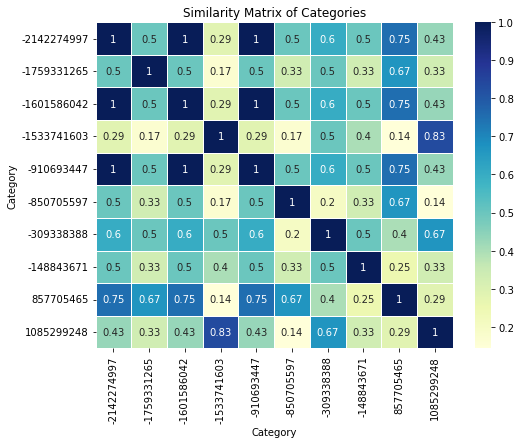

In [ ]:
# heat matrix
similarity_matrix = pd.DataFrame(index=journey["customer_id"], columns=journey['customer_id'])

for i, row_i in journey.iterrows():
    for j, row_j in journey.iterrows():
        category_i = row_i['customer_id']
        category_j = row_j['customer_id']
        values_i = set(row_i['stage'])
        values_j = set(row_j['stage'])
        similarity = len(values_i.intersection(values_j)) / len(values_i.union(values_j))
        similarity_matrix.at[category_i, category_j] = similarity

# Convert similarity values to float
similarity_matrix = similarity_matrix.astype(float)

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(similarity_matrix, annot=True, cmap="YlGnBu", linewidths=.5)
plt.title('Similarity Matrix of Categories')
plt.xlabel('Category')
plt.ylabel('Category')
plt.show()

In [ ]:
test.dtypes

customer_id                  int64
ed_id                        int64
journey_steps_until_end      int64
event_name                  object
journey_id                 float64
milestone_number           float64
stage                       object
dtype: object

In [ ]:
# make customer_id not integer
test["customer_id"] = test["customer_id"].astype('string')

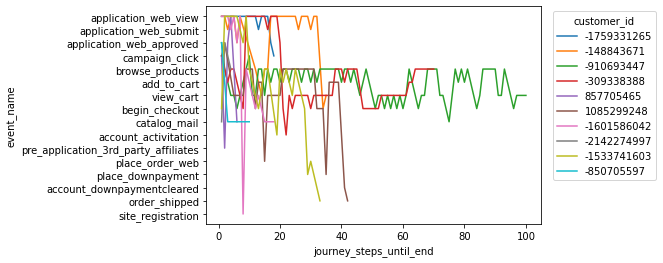

In [ ]:
# ed_id vs steps
ax = sns.lineplot(data = test,
            x = 'journey_steps_until_end',
            y = 'event_name',
            hue = "customer_id")

sns.move_legend(ax, "upper left", bbox_to_anchor = (1.02, 1))

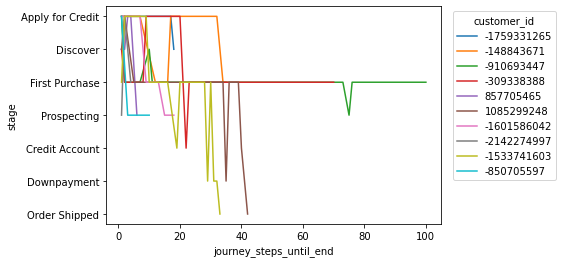

In [ ]:
# stage vs steps
ax = sns.lineplot(data = test,
            x = 'journey_steps_until_end',
            y = 'stage',
            hue = "customer_id")

sns.move_legend(ax, "upper left", bbox_to_anchor = (1.02, 1))

# MAIN DATASET

In [ ]:
# reload dataset before revisions
df = pd.read_csv("export.csv")

In [ ]:
# preview dataset
df.head()

,customer_id,account_id,ed_id,event_name,event_timestamp,journey_steps_until_end
0,-784961211,1773350293,12,application_web_approved,2023-03-22T08:45:22.000Z,1
1,-784961211,1773350293,19,application_web_view,2023-03-22T13:32:10.000Z,2
2,-784961211,1773350293,19,application_web_view,2023-03-22T13:32:10.000Z,3
3,-784961211,1773350293,19,application_web_view,2023-03-22T13:32:10.000Z,4
4,-784961211,1773350293,19,application_web_view,2023-03-22T13:32:10.000Z,5


In [ ]:
# dimensions
# 64911906 rows
# 6 columns
df.shape

(64911906, 6)

In [ ]:
# event definitions
ed = pd.read_csv("Event Definitions.csv")
ed = ed.rename(columns = {"event_definition_id": "ed_id"})

In [ ]:
ed

,event_name,journey_id,ed_id,milestone_number,stage
0,application_phone_approved,1,15,1.0,Apply for Credit
1,application_phone_declined,1,16,NaN,Apply for Credit
2,application_phone_pending,1,17,NaN,Apply for Credit
3,application_web_approved,1,12,1.0,Apply for Credit
4,application_web_declined,1,13,NaN,Apply for Credit
5,application_web_pending,1,14,NaN,Apply for Credit
6,application_web_submit,1,3,NaN,Apply for Credit
7,application_web_view,1,19,NaN,Apply for Credit
8,account_activitation,1,29,3.0,Credit Account
9,account_fraud_review,1,37,NaN,Credit Account


In [ ]:
temp = pd.merge(df, ed, how = "left", on = "ed_id")
temp

,customer_id,account_id,ed_id,event_name_x,event_timestamp,journey_steps_until_end,event_name_y,journey_id,milestone_number,stage
0,-784961211,1773350293,12,application_web_approved,2023-03-22T08:45:22.000Z,1,application_web_approved,1.0,1.0,Apply for Credit
1,-784961211,1773350293,19,application_web_view,2023-03-22T13:32:10.000Z,2,application_web_view,1.0,NaN,Apply for Credit
2,-784961211,1773350293,19,application_web_view,2023-03-22T13:32:10.000Z,3,application_web_view,1.0,NaN,Apply for Credit
3,-784961211,1773350293,19,application_web_view,2023-03-22T13:32:10.000Z,4,application_web_view,1.0,NaN,Apply for Credit
4,-784961211,1773350293,19,application_web_view,2023-03-22T13:32:10.000Z,5,application_web_view,1.0,NaN,Apply for Credit
...,...,...,...,...,...,...,...,...,...,...
64911901,-865005459,-983311387,29,account_activitation,2021-05-14T00:00:00.000Z,40,account_activitation,1.0,3.0,Credit Account
64911902,-865005459,-983311387,5,view_cart,2021-05-15T09:27:47.000Z,41,view_cart,1.0,NaN,First Purchase
64911903,-865005459,-983311387,24,campaignemail_clicked,2021-05-15T14:27:33.000Z,42,NaN,NaN,NaN,NaN
64911904,-865005459,-983311387,27,account_downpaymentcleared,2021-05-16T00:00:00.000Z,43,account_downpaymentcleared,1.0,5.0,Downpayment


# Multiple Journeys Function

In [ ]:
def mj(df):
    """
    Checks for nultiple journeys for each customer

    Input: df, dataset to use

    Output: GroupedBy Dataframe

    """
    # sort by time
    df = df.sort_values(by = "event_timestamp")

    # keep relevant columns
    mask = ["customer_id", "stage", "journey_steps_until_end", "ed_id"]
    df = df[mask]

    # check for # of journeys for each customer
    journ = df.groupby("customer_id")["journey_steps_until_end"].apply(lambda x: (x == 1).cumsum())

    # add column back to dataset
    #df = pd.merge(df, journ, on = "customer_id")
    #df = df.rename(columns = {"journey_steps_until_end_y": "journey"})
    df["journey"] = journ

    # perform groupby which returns both the Journey # and Path
    m = pd.DataFrame(df.groupby(["customer_id", "journey"])["stage", "ed_id"].agg(list)).reset_index()
    m = m.rename(columns = {"ed_id": "Path"})

    # make sure customer column is in integer
    m["customer_id"] = m["customer_id"].astype(int)

    return m

In [ ]:
MJ = mj(temp)
MJ

/var/folders/x8/_2v65kgx1zxc0k4y6d9hts5h0000gn/T/ipykernel_11358/3969596689.py:26: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  m = pd.DataFrame(df.groupby(["customer_id", "journey"])["stage", "ed_id"].agg(list)).reset_index()


,customer_id,journey,stage,Path
0,-2147483541,1,"[Apply for Credit, First Purchase, First Purch...","[12, 5, 4, 11, 5, 6, 1, 4, 11, 4, 11, 5, 6, 5,..."
1,-2147481037,1,"[Apply for Credit, nan, Discover, First Purcha...","[12, 1, 2, 4, 11, 6, 5, 6, 6, 5, 5, 4, 4]"
2,-2147474335,1,"[Discover, Apply for Credit, Apply for Credit,...","[2, 12, 19, 19, 19, 19, 19, 19, 19, 19, 19, 4,..."
3,-2147474305,1,"[First Purchase, Apply for Credit, Apply for C...","[6, 19, 19, 19, 19, 19, 19, 19, 19, 1, 4, 19, ..."
4,-2147472167,1,"[Apply for Credit, Apply for Credit, Apply for...","[12, 19, 3, 19, 19, 19, 19, 19, 19, 19, 19, 19..."
...,...,...,...,...
1818995,2147480051,1,"[Prospecting, Discover, Discover, Apply for Cr...","[21, 2, 22, 12, 24, 1, 21, 1, 1, 21, 1, 1, 1, 1]"
1818996,2147480182,1,"[Apply for Credit, Discover, nan, First Purcha...","[12, 2, 24, 4, 4, 4, 4, 4, 4, 24, 24, 24, 24, 24]"
1818997,2147480920,1,"[Discover, Apply for Credit, Apply for Credit,...","[2, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 3,..."
1818998,2147482120,1,"[Apply for Credit, Apply for Credit, Apply for...","[12, 19, 19, 2]"


In [ ]:
# save the data right now
MJ.to_csv('MJ.csv')

# Statistics on Multiple Journeys

## Journey Lengths

In [ ]:
# Function to calculate the length of each journey
def journey_length(journey):
    return len(journey)

In [ ]:
# Apply the function to each row and create a new column 'Journey Length'
MJ['Journey Length'] = MJ['stage'].apply(journey_length)

In [ ]:
# Calculate the mean journey length
mean_journey_length = MJ['Journey Length'].mean()

print("Mean Journey Length:", mean_journey_length)

Mean Journey Length: 35.68548982957669


In [ ]:
# Compute additional statistics
median_journey_length = MJ['Journey Length'].median()
min_journey_length = MJ['Journey Length'].min()
max_journey_length = MJ['Journey Length'].max()
std_dev_journey_length = MJ['Journey Length'].std()
journey_length_freq = MJ['Journey Length'].value_counts().sort_index()

print("Median Journey Length:", median_journey_length)
print("Minimum Journey Length:", min_journey_length)
print("Maximum Journey Length:", max_journey_length)
print("Standard Deviation of Journey Lengths:", std_dev_journey_length)
print("\nFrequency Distribution of Journey Lengths:")
print(journey_length_freq)

Median Journey Length: 24.0
Minimum Journey Length: 1
Maximum Journey Length: 3299
Standard Deviation of Journey Lengths: 43.07376466993228

Frequency Distribution of Journey Lengths:
1       112554
2        59786
3        36388
4        26431
5        24970
         ...  
2122         1
2349         1
2708         1
2764         1
3299         1
Name: Journey Length, Length: 912, dtype: int64


In [ ]:
# Apply the function to each row and create a new column 'Journey Length'
MJ['Journey Length'] = MJ['stage'].apply(journey_length)

# Calculate the mean journey length
mean_journey_length = MJ['Journey Length'].mean()

print("Mean Journey Length:", mean_journey_length)

# Compute additional statistics
median_journey_length = MJ['Journey Length'].median()
min_journey_length = MJ['Journey Length'].min()
max_journey_length = MJ['Journey Length'].max()
std_dev_journey_length = MJ['Journey Length'].std()
journey_length_freq = MJ['Journey Length'].value_counts().sort_index()

print("Median Journey Length:", median_journey_length)
print("Minimum Journey Length:", min_journey_length)
print("Maximum Journey Length:", max_journey_length)
print("Standard Deviation of Journey Lengths:", std_dev_journey_length)
print("\nFrequency Distribution of Journey Lengths:")
print(journey_length_freq)# Function to calculate the length of each journey# Function to calculate the length of each journey

Text(0.5, 1.0, 'Distribution of Journey Lengths')

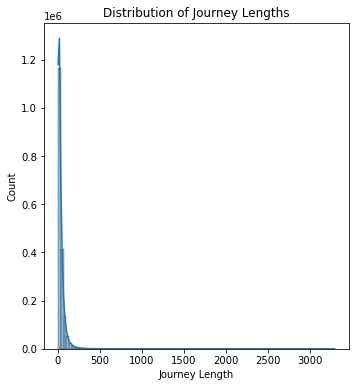

In [ ]:
# Plot distributions
plt.figure(figsize=(12, 6))

# Distribution of journey lengths
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Journey Length', bins=100, kde=True)
plt.title('Distribution of Journey Lengths')

# Journey Lengths by Customer

In [ ]:
# Count the number of journeys per customer
journeys_per_customer = MJ.groupby('customer_id')['journey'].nunique()

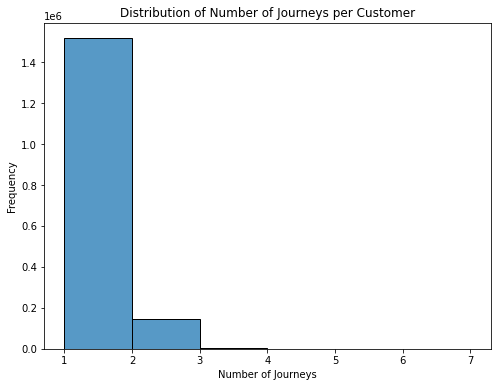

In [ ]:
# Plot the distribution of the number of journeys
plt.figure(figsize=(8, 6))
sns.histplot(journeys_per_customer, bins=range(1, journeys_per_customer.max() + 2), kde=False)
plt.title('Distribution of Number of Journeys per Customer')
plt.xlabel('Number of Journeys')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Calculate total number of journeys
total_journeys = len(MJ)

# Calculate total number of unique customers
total_customers = MJ['customer_id'].nunique()

# Calculate average number of journeys
average_journeys = total_journeys / total_customers

print("Average Number of Journeys:", average_journeys)

Average Number of Journeys: 1.0920412466200153


In [ ]:
# Flatten the list of stages
all_stages = [stage for stages in MJ['stage'] for stage in stages]

In [ ]:
# Distribution of stages visited per journey
plt.figure(figsize=(8, 6))
ax = sns.histplot(data=all_stages, bins=len(set(all_stages)), discrete=True)

In [ ]:
labels = ["Apply for Credit",
         "First Purchase",
         "Misc",
         "Prospecting",
         "Discovery",
         "Downpayment",
         "Credit Account",
         "Order Shipped"]

In [ ]:
ax.set_title('Distribution of Stages Visited per Journey', y = 1.05)
ax.set_xticklabels(labels, rotation = 90)
fig = ax.get_figure()

/var/folders/x8/_2v65kgx1zxc0k4y6d9hts5h0000gn/T/ipykernel_1937/1569450900.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation = 90)


In [ ]:
labels = ["Apply for Credit",
         "First Purchase",
         "Misc",
         "Prospecting",
         "Discovery",
         "Downpayment",
         "Credit Account",
         "Order Shipped"]

In [ ]:
ax.set_title('Distribution of Stages Visited per Journey', y = 1.05)
ax.set_xticklabels(labels, rotation = 90)
fig = ax.get_figure()

/var/folders/x8/_2v65kgx1zxc0k4y6d9hts5h0000gn/T/ipykernel_1937/1569450900.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation = 90)


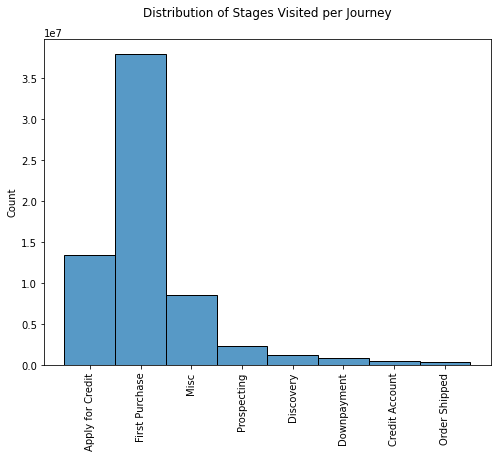

In [ ]:
fig

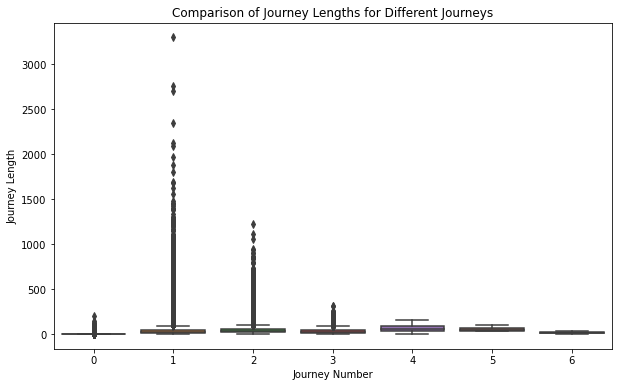

In [ ]:
# Plotting the distribution of journey lengths for each journey
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df, x='journey', y='Journey Length')
plt.title('Comparison of Journey Lengths for Different Journeys')
plt.xlabel('Journey Number')
plt.ylabel('Journey Length')
plt.show()

# Stage

## APPLY FOR CREDIT —> FIRST PURCHASE —> DOWN PAYMENT —> ORDER SHIPPED

In [ ]:
# reload data; we will work with the list as a stringed form
df = pd.read_csv("MJ.csv")
df = df.drop("Unnamed: 0", axis = 1)

In [ ]:
# define ideal path
ideal = ["Apply for Credit",
         "First Purchase",
         "Downpayment",
         "Order Shipped"]

In [ ]:
# extract stages
stages = df["stage"].values

In [ ]:
# to deal with nan values; treat them as its own category
def handle_nan(x):
    return re.sub(r'\bnan\b', "'misc'", x)

In [ ]:
# deal with quote issue around stages + nans
stages = [ast.literal_eval(handle_nan(s)) for s in stages]

In [ ]:
# deal w/ quote issue (if nans already fixed)
#stages = [eval(s) for s in stages]

In [ ]:
df["stage"] = stages

In [ ]:
# function to determine how ideal a customer's journey is
def similarity_score(lst):

    # hold ideal for repeating stages
    # if match, +1 score
    # if no match, 0 score

    # e.g.
    # Hold Apply For Credit in Ideal
    # First event is apply for credit: +1
    # Hold First Purchase in Ideal
    # Second event is not first purchase: 0
    # continue until First Purchase appears

    score = 0

    # index for ideal
    m = 0

    for i in range(len(lst)):

        # stop at max length of ideal
        if m > len(ideal) - 1:
            break

        # if stage matches ideal
        if lst[i] == ideal[m]:
            score += 1
            m += 1

        # indexing out of range
        if i + 1 > len(lst) - 1:
            break

    return score

In [ ]:
#  Calculate similarity scores for each list
similarity_scores = [similarity_score(s) for s in stages]

In [ ]:
# Minimum number of matching elements to consider a list good
# check if all stages reached (ideal)
threshold = 4

In [ ]:
# Label the lists based on similarity score
labels = [1 if score >= threshold else 0 for score in similarity_scores]

In [ ]:
np.unique(labels)

array([0, 1])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'Is Ideal Path')]

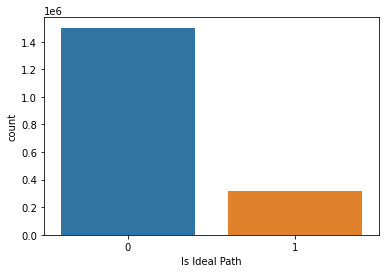

In [ ]:
# dataset is initially unbalanced
ax = sns.countplot(labels)
ax.set(xlabel = "Is Ideal Path")

In [ ]:
labels.count(1) # # ideal paths

labels.count(0) # # non-ideal pathslabels.count(1) # # ideal paths

317592

In [ ]:
# store labels for reuse
imb = pd.concat([df["stage"], pd.DataFrame(labels)], axis = 1)
imb = imb.rename(columns = {0: "label"})

In [ ]:
imb

,stage,label
0,"['Apply for Credit', 'First Purchase', 'First ...",0
1,"['Apply for Credit', 'misc', 'Discover', 'Firs...",0
2,"['Discover', 'Apply for Credit', 'Apply for Cr...",1
3,"['First Purchase', 'Apply for Credit', 'Apply ...",0
4,"['Apply for Credit', 'Apply for Credit', 'Appl...",1
...,...,...
1818995,"['Prospecting', 'Discover', 'Discover', 'Apply...",0
1818996,"['Apply for Credit', 'Discover', 'misc', 'Firs...",0
1818997,"['Discover', 'Apply for Credit', 'Apply for Cr...",0
1818998,"['Apply for Credit', 'Apply for Credit', 'Appl...",0


In [ ]:
# save again; store lists as type string for pre-processing
imb.to_csv("imb.csv")

# Preprocessing

In [ ]:
# reload data w/ labels
# keep the stages as strings of lists
df = pd.read_csv("imb.csv")
df = df.drop("Unnamed: 0", axis = 1)

## Train-Test Split + Feature Engineering

In [ ]:
X = list(df["stage"].values)
y = df["label"].values

In [ ]:
# Split data into training and testing sets (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 42)

In [ ]:
# Compute class weights
class_weights = compute_class_weight('balanced',
                                     classes = np.unique(y_train),
                                     y = y_train)

In [ ]:
vectorizer = CountVectorizer()

In [ ]:
X_train_vec = vectorizer.fit_transform(X_train)

In [ ]:
X_test_vec = vectorizer.transform(X_test)

In [ ]:
# Oversample the minority class
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_vec, y_train)

# Save Vectorized Data

In [ ]:
# Save resampled data using pickle
with open('X_train_resampled.pkl', 'wb') as f:
    pickle.dump(X_train_resampled, f)

with open('y_train_resampled.pkl', 'wb') as f:
    pickle.dump(y_train_resampled, f)

with open('X_test_vec.pkl', 'wb') as f:
    pickle.dump(X_test_vec, f)

with open('y_test.pkl', 'wb') as f:
    pickle.dump(y_test, f)

# Load Vectorized Data

In [ ]:
# Load resampled data
with open('X_train_resampled.pkl', 'rb') as f:
    X_train_resampled = pickle.load(f)

with open('y_train_resampled.pkl', 'rb') as f:
    y_train_resampled = pickle.load(f)

with open('X_test_vec.pkl', 'rb') as f:
    X_test_vec = pickle.load(f)

with open('y_test.pkl', 'rb') as f:
    y_test = pickle.load(f)

# Logistic Regression

In [ ]:
# Initialize logistic regression model with class weights
log_reg = LogisticRegression(class_weight={0: class_weights[0], 1: class_weights[1]})

In [ ]:
# Train the model
log_reg.fit(X_train_resampled, y_train_resampled)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight={0: 0.6057109653164706, 1: 2.8649391456370314})

In [ ]:
y_pred = log_reg.predict(X_test_vec)

In [ ]:
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    300175
           1       0.98      1.00      0.99     63625

    accuracy                           1.00    363800
   macro avg       0.99      1.00      1.00    363800
weighted avg       1.00      1.00      1.00    363800

Confusion Matrix:
[[299178    997]
 [     0  63625]]


## Grid Search

In [ ]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100]  # Regularization parameter values to try
}

In [ ]:
# Create GridSearchCV object
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train_resampled, y_train_resampled)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='accuracy')

In [ ]:
# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred = best_model.predict(X_test_vec)

In [ ]:
# Print classification report and confusion matrix
print("Best Model Parameters:", grid_search.best_params_)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Best Model Parameters: {'C': 10}
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    300175
           1       0.99      1.00      0.99     63625

    accuracy                           1.00    363800
   macro avg       0.99      1.00      1.00    363800
weighted avg       1.00      1.00      1.00    363800

Confusion Matrix:
[[299404    771]
 [     0  63625]]


# BEST LOGISTIC REGRESSION MODEL

In [ ]:
# Define and train logistic regression model with L2 regularization
log_reg_l2 = LogisticRegression(penalty = 'l2',
                                C = 10,
                                max_iter=1000)  # You can adjust C for regularization strength

log_reg_l2.fit(X_train_resampled, y_train_resampled)

LogisticRegression(C=10, max_iter=1000)

In [ ]:
# Evaluate the model
y_pred_l2 = log_reg_l2.predict(X_test_vec)

In [ ]:
# Print classification report and confusion matrix
print("Classification Report with L2 Regularization:")
print(classification_report(y_test, y_pred_l2))
print("Confusion Matrix with L2 Regularization:")
print(confusion_matrix(y_test, y_pred_l2))

Classification Report with L2 Regularization:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    300175
           1       0.99      1.00      0.99     63625

    accuracy                           1.00    363800
   macro avg       0.99      1.00      1.00    363800
weighted avg       1.00      1.00      1.00    363800

Confusion Matrix with L2 Regularization:
[[299523    652]
 [     0  63625]]


In [ ]:
# Get coefficients and intercept
coefficients = log_reg_l2.coef_
intercept = log_reg_l2.intercept_

# Print coefficients and intercept
print("Coefficients:")
for i, coef in enumerate(coefficients[0]):
    print("Feature {}: {:.4f}".format(i+1, coef))

print("\nIntercept: {:.4f}".format(intercept[0]))

Coefficients:
Feature 1: 1.0370
Feature 2: -0.3475
Feature 3: 0.6895
Feature 4: -0.2832
Feature 5: 4.2152
Feature 6: 0.0049
Feature 7: -0.3475
Feature 8: 0.0108
Feature 9: 24.8365
Feature 10: 0.2454
Feature 11: 0.0049
Feature 12: 24.8365

Intercept: -52.0677


In [ ]:
# Get regularization strength and penalty
C = log_reg_l2.C
penalty = log_reg_l2.penalty

# Print regularization details
print("\nRegularization:")
print("Regularization Strength (C):", C)
print("Penalty:", penalty)


Regularization:
Regularization Strength (C): 10
Penalty: l2


## ROC Curve

In [ ]:
# Compute predicted probabilities for the positive class
y_prob = log_reg_l2.predict_proba(X_test_vec)[:, 1]

In [ ]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

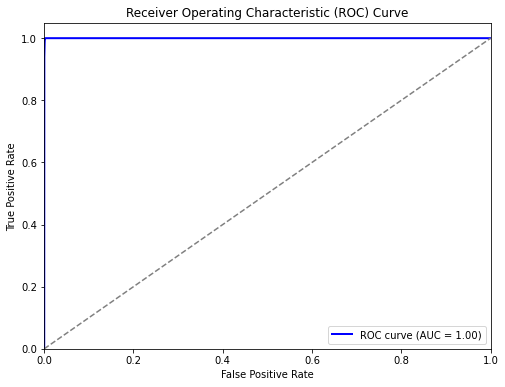

In [ ]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Define Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
# Create the pipeline with Random Forest classifier
pipeline = Pipeline([
    ('rf', rf_classifier)
])

In [ ]:
# Fit the pipeline on the resampled training data
pipeline.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('rf', RandomForestClassifier(random_state=42))])

In [ ]:
# Predict on the test data
y_pred = pipeline.predict(X_test_vec)

In [ ]:
# Evaluate the accuracy on the training set
train_accuracy = accuracy_score(y_train_resampled,
                                       pipeline.predict(X_train_resampled))
print("Training Accuracy (after pruning):", train_accuracy)

Training Accuracy (after pruning): 0.999900935122495


In [ ]:
# Evaluate the accuracy on the test set
test_accuracy = accuracy_score(y_test,
                                      pipeline.predict(X_test_vec))
print("Test Accuracy (after pruning):", test_accuracy)

Test Accuracy (after pruning): 0.9997608576140736


In [ ]:
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    300175
           1       1.00      1.00      1.00     63625

    accuracy                           1.00    363800
   macro avg       1.00      1.00      1.00    363800
weighted avg       1.00      1.00      1.00    363800

Confusion Matrix:
[[300093     82]
 [     5  63620]]


In [ ]:
# Calculate and print AUC-ROC score
y_pred_proba = pipeline.predict_proba(X_test_vec)[:, 1]
auc_roc = roc_auc_score(y_test, y_pred_proba)
print("AUC-ROC Score:", auc_roc)

AUC-ROC Score: 0.9999210427839819


In [ ]:
# Get feature importances
feature_importances = pipeline.named_steps['rf'].feature_importances_

In [ ]:
# Print feature importances
print("Feature Importances:")
for i, importance in enumerate(feature_importances):
    print("Feature {}: {:.4f}".format(i+1, importance))

Feature Importances:
Feature 1: 0.1340
Feature 2: 0.0001
Feature 3: 0.0357
Feature 4: 0.0000
Feature 5: 0.2503
Feature 6: 0.0249
Feature 7: 0.0003
Feature 8: 0.0014
Feature 9: 0.2891
Feature 10: 0.0032
Feature 11: 0.0138
Feature 12: 0.2472


In [ ]:
# Get other parameters of the Random Forest classifier
rf_classifier_params = pipeline.named_steps['rf'].get_params()

In [ ]:
# Print other parameters
print("\nRandom Forest Classifier Parameters:")
for param_name, param_value in rf_classifier_params.items():
    print("{}: {}".format(param_name, param_value))


Random Forest Classifier Parameters:
bootstrap: True
ccp_alpha: 0.0
class_weight: None
criterion: gini
max_depth: None
max_features: sqrt
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
monotonic_cst: None
n_estimators: 100
n_jobs: None
oob_score: False
random_state: 42
verbose: 0
warm_start: False


In [ ]:
# Extract a single decision tree from the Random Forest model
tree_estimator = pipeline.named_steps['rf'].estimators_[0]  # Extract the first tree, you can choose any tree

In [ ]:
num_features = X_train_resampled.shape[1]

In [ ]:
feature_names = [f"feature_{i}" for i in range(num_features)]

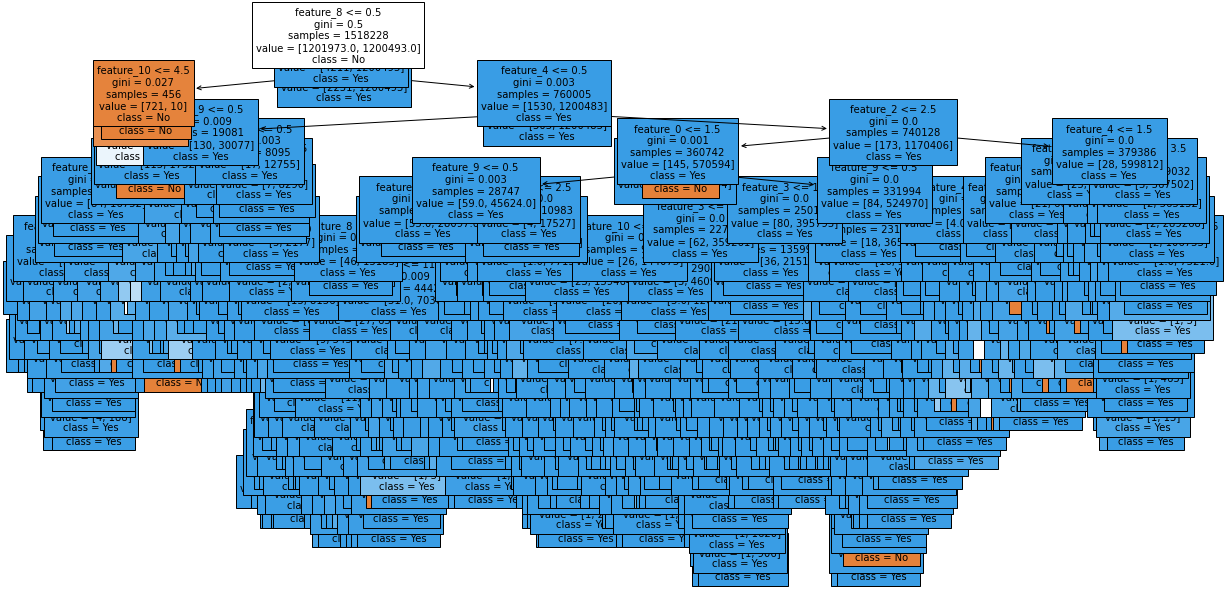

In [ ]:
# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(tree_estimator, filled=True, feature_names=feature_names, class_names=["No", "Yes"], fontsize=10)
plt.show()

## Pruning

- controls complexity and prevents overfitting; restrict ability to memorize training data

In [ ]:
# Apply pruning by setting the maximum depth of each tree in the ensemble
pruned_rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
pruned_rf_classifier.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(max_depth=5, random_state=42)

In [ ]:
# Evaluate the accuracy on the training set after pruning
pruned_train_accuracy = accuracy_score(y_train_resampled, pruned_rf_classifier.predict(X_train_resampled))
print("Training Accuracy (after pruning):", pruned_train_accuracy)

Training Accuracy (after pruning): 0.9998834530852883


In [ ]:
# Evaluate the accuracy on the test set after pruning
pruned_test_accuracy = accuracy_score(y_test, pruned_rf_classifier.predict(X_test_vec))
print("Test Accuracy (after pruning):", pruned_test_accuracy)

Test Accuracy (after pruning): 0.9997746014293568


# K-Means Clustering

In [ ]:
# Perform K-means clustering
k = 2  # Number of clusters (you may adjust this)
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_train_resampled)

KMeans(n_clusters=2, random_state=42)

In [ ]:
# Assign cluster labels to training data
X_train_cluster_labels = kmeans.labels_.reshape(-1, 1)

In [ ]:
# Train logistic regression classifier on cluster labels
lr_classifier = LogisticRegression(random_state=42)
lr_classifier.fit(X_train_cluster_labels, y_train_resampled)

LogisticRegression(random_state=42)

In [ ]:
# Assign cluster labels to test data
X_test_cluster_labels = kmeans.predict(X_test_vec).reshape(-1, 1)

In [ ]:
# Make predictions on test data using logistic regression classifier
y_pred_test = lr_classifier.predict(X_test_cluster_labels)

In [ ]:
# Evaluate the performance of the classifier
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy (K-means + Logistic Regression):", test_accuracy)

Test Accuracy (K-means + Logistic Regression): 0.8118141836173722


In [ ]:
# Evaluate clustering performance
#silhouette = silhouette_score(X_train_resampled, kmeans.labels_)
#print("Silhouette Score:", silhouette)

# Evaluate logistic regression classifier performance
print("Classification Report:")
print(classification_report(y_test, y_pred_test))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))

# Overall accuracy
overall_accuracy = accuracy_score(y_test, y_pred_test)
print("Overall Test Accuracy:", overall_accuracy)

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.96      0.89    300175
           1       0.39      0.13      0.20     63625

    accuracy                           0.81    363800
   macro avg       0.61      0.54      0.55    363800
weighted avg       0.76      0.81      0.77    363800

Confusion Matrix:
[[286805  13370]
 [ 55092   8533]]
Overall Test Accuracy: 0.8118141836173722


In [ ]:
# Compute silhouette score for a subset of the test data
num_samples = 50000  # Adjust the number of samples as needed

In [ ]:
# Evaluate clustering performance
silhouette = silhouette_score(X_train_resampled[:num_samples], kmeans.labels_[:num_samples])
print("Silhouette Score:", silhouette)

Silhouette Score: 0.7582168861186174


In [ ]:
# Compute predicted probabilities for the positive class
y_prob = lr_classifier.predict_proba(X_test_cluster_labels)[:, 1]

In [ ]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

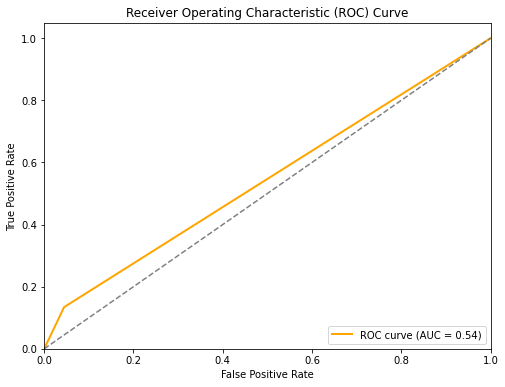

In [ ]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Reduce dimensionality of the data using PCA
pca = PCA(n_components=2, svd_solver = 'arpack')
X_train_pca = pca.fit_transform(X_train_resampled)

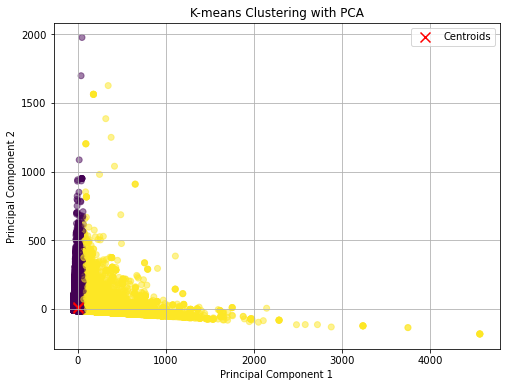

In [ ]:
# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=kmeans.labels_, cmap='viridis', marker='o', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.title('K-means Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

# BEST K-MEANS CLUSTERING

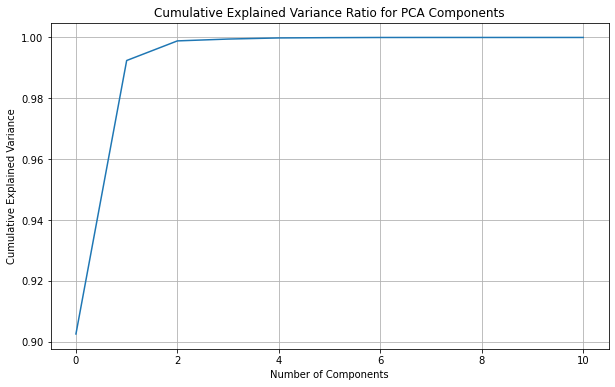

In [ ]:
# Initialize PCA with 'arpack' solver
pca = PCA(svd_solver='arpack')

# Fit PCA to resampled training data
pca.fit(X_train_resampled)

# Plot cumulative explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Ratio for PCA Components')
plt.grid(True)
plt.show()

In [ ]:
# Determine the optimal number of components using TruncatedSVD
optimal_components = np.argmax(np.cumsum(svd.explained_variance_ratio_) >= 0.95) + 1
print("Optimal number of components:", optimal_components)

Optimal number of components: 2


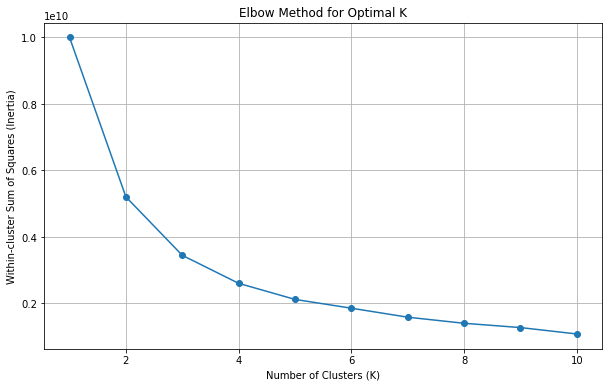

In [ ]:
# Apply KMeans with the optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca.transform(X_train_resampled))
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-cluster Sum of Squares (Inertia)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

In [ ]:
# Determine the optimal number of clusters for K-means
optimal_clusters = 3  # Replace with the optimal number of clusters determined earlier
print("Optimal number of clusters:", optimal_clusters)

Optimal number of clusters: 3


In [ ]:
# Feature scaling
scaler = StandardScaler(with_mean = False)
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test_vec)

In [ ]:
# Dimensionality reduction using PCA
pca = PCA(n_components=2, svd_solver = 'arpack')
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [ ]:
X_train_pca.shape, X_test_pca.shape

((2402466, 2), (363800, 2))

In [ ]:
X_train_pca

array([[-0.81694707, -0.75469815],
       [-2.2407483 , -0.53008729],
       [ 1.47653601, -0.60352308],
       ...,
       [ 1.45630052, -1.40401422],
       [ 3.0198398 , -0.94515531],
       [ 2.25336178,  0.9132947 ]])

In [ ]:
X_test_pca

array([[-2.18492964, -0.83602866],
       [ 1.2944448 , -1.49490688],
       [ 1.40339351,  0.6184559 ],
       ...,
       [ 1.26402142, -1.25049732],
       [-1.32497008,  1.47813369],
       [-1.06969588, -0.7411892 ]])

In [ ]:
pca.components_

array([[ 0.45549406,  0.09983441,  0.11997413, -0.00432839,  0.4162464 ,
         0.25416489,  0.09983441, -0.03739747,  0.46085959, -0.17186176,
         0.25416489,  0.46085959],
       [-0.11044639,  0.55710014,  0.55104806,  0.00362293, -0.10800297,
         0.08293696,  0.55710014,  0.06918446, -0.12794212,  0.02160531,
         0.08293696, -0.12794212]])

In [ ]:
pca.components_.shape

(2, 12)

In [ ]:
# Initialize K-means with optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)

In [ ]:
# Fit K-means to the data
kmeans.fit(X_train_pca)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [ ]:
# Step 5: Assign cluster labels to training and test data
X_train_cluster_labels = kmeans.labels_.reshape(-1, 1)
X_test_cluster_labels = kmeans.predict(X_test_pca).reshape(-1, 1)

In [ ]:
# Step 6: Train logistic regression classifier with hyperparameter tuning
param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10]}  # Adjust as needed
grid_search_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5)
grid_search_lr.fit(X_train_pca, y_train_resampled)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [ ]:
best_C = grid_search_lr.best_params_['C']
print("Best value of C for Logistic Regression:", best_C)

Best value of C for Logistic Regression: 10


In [ ]:
# Step 6: Train logistic regression classifier on cluster labels
lr_classifier = LogisticRegression(C = best_C, random_state=42)
lr_classifier.fit(X_train_cluster_labels, y_train_resampled)

LogisticRegression(C=10, random_state=42)

In [ ]:
# Step 7: Make predictions on test data using logistic regression classifier
y_pred_test = lr_classifier.predict(X_test_cluster_labels)

In [ ]:
# Step 8: Evaluate the performance of the classifier
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy (K-means + Logistic Regression):", test_accuracy)

Test Accuracy (K-means + Logistic Regression): 0.9588152831225948


In [ ]:
# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_test))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:")
print(conf_matrix)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    300175
           1       0.81      1.00      0.89     63625

    accuracy                           0.96    363800
   macro avg       0.90      0.98      0.93    363800
weighted avg       0.97      0.96      0.96    363800

Confusion Matrix:
[[285192  14983]
 [     0  63625]]


In [ ]:
# Compute silhouette score for a subset of the test data
num_samples = 50000  # Adjust the number of samples as needed

In [ ]:
# Compute silhouette score for the training data
silhouette_train_sub = silhouette_score(X_train_pca[:num_samples],
                                        kmeans.labels_[:num_samples])
print("Silhouette Score (Training):", silhouette_train_sub)

Silhouette Score (Training): 0.658752700822443


In [ ]:
# Compute silhouette score for the test data
silhouette_avg_test = silhouette_score(X_test_pca[:num_samples],
                                       X_test_cluster_labels[:num_samples])
print("Silhouette Score (Test Data):", silhouette_avg_test)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score (Test Data): 0.6540041254935431


In [ ]:
# Compute predicted probabilities for the positive class
y_prob = lr_classifier.predict_proba(X_test_cluster_labels)[:, 1]

In [ ]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

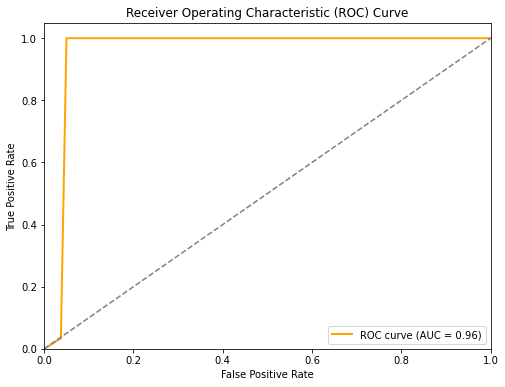

In [ ]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

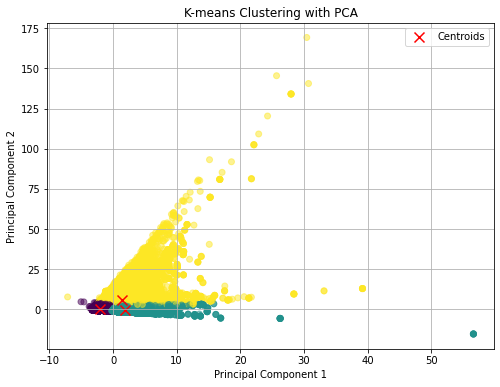

In [ ]:
# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0],
            X_train_pca[:, 1],
            c=kmeans.labels_,
            cmap='viridis',
            marker='o',
            alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.title('K-means Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

# Question 2 (Zach)

In [ ]:
year_2023 = df[df["event_timestamp"].str[:4] == "2023"]
year_2022 = df[df["event_timestamp"].str[:4] == "2022"]
year_2021 = df[df["event_timestamp"].str[:4] == "2021"]

In [ ]:
month_day_2023 = year_2023["event_timestamp"].str[5:10]
month_day_2022 = year_2022["event_timestamp"].str[5:10]
month_day_2021 = year_2021["event_timestamp"].str[5:10]

In [ ]:

month_day_2023 = pd.DataFrame(month_day_2023)
new_month_day_2023 = pd.to_datetime(month_day_2023["event_timestamp"], format='%m-%d').dt.isocalendar().week
year_2023["week_num"] = new_month_day_2023

month_day_2022 = pd.DataFrame(month_day_2022)
new_month_day_2022 = pd.to_datetime(month_day_2022["event_timestamp"], format='%m-%d').dt.isocalendar().week
year_2022["week_num"] = new_month_day_2022

month_day_2021 = pd.DataFrame(month_day_2021)
new_month_day_2021 = pd.to_datetime(month_day_2021["event_timestamp"], format='%m-%d').dt.isocalendar().week
year_2021["week_num"] = new_month_day_2021

/var/folders/rn/rhn0s_y160d3m24ymvbrr9gh0000gn/T/ipykernel_13626/3715088873.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_2023["week_num"] = new_month_day_2023
/var/folders/rn/rhn0s_y160d3m24ymvbrr9gh0000gn/T/ipykernel_13626/3715088873.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_2022["week_num"] = new_month_day_2022
/var/folders/rn/rhn0s_y160d3m24ymvbrr9gh0000gn/T/ipykernel_13626/3715088873.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [ ]:
df["Year-Month"] = df["event_timestamp"].str[:7]
mask = ["account_id", "event_name", "week_num"]

df_y2021 = year_2021[mask]
df_y2022 = year_2022[mask]
df_y2023 = year_2023[mask]

In [ ]:
df_y2021.groupby(["event_name", "week_num"]).agg({"account_id": "nunique"}).reset_index()
df_y2021.sort_values(by = "week_num", ascending = False)

df_y2022.groupby(["event_name", "week_num"]).agg({"account_id": "nunique"}).reset_index()
df_y2022.sort_values(by = "week_num", ascending = False)

df_y2023.groupby(["event_name", "week_num"]).agg({"account_id": "nunique"}).reset_index()
df_y2023.sort_values(by = "week_num", ascending = False)

,account_id,event_name,week_num
7835201,1320567629,campaignemail_clicked,38
1259422,714273301,application_web_approved,38
1259428,1665922628,application_web_approved,38
1259427,2127891516,application_web_approved,38
37790392,1682786533,application_web_approved,38
...,...,...,...
5568847,1100353964,promotion_created,1
37626451,-570125490,application_web_approved,1
37626450,-570125490,campaign_click,1
37626449,32501893,promotion_created,1


In [ ]:
ny2021 = pd.merge(df_y2021, ed, how = "left", on="event_name")
ny2022 = pd.merge(df_y2022, ed, how = "left", on="event_name")
ny2023 = pd.merge(df_y2023, ed, how = "left", on="event_name")

subset_2021 = ny2021[["stage", "week_num"]].sort_values(by="week_num")
subset_2022 = ny2022[["stage", "week_num"]].sort_values(by="week_num")
subset_2023 = ny2023[["stage", "week_num"]].sort_values(by="week_num")


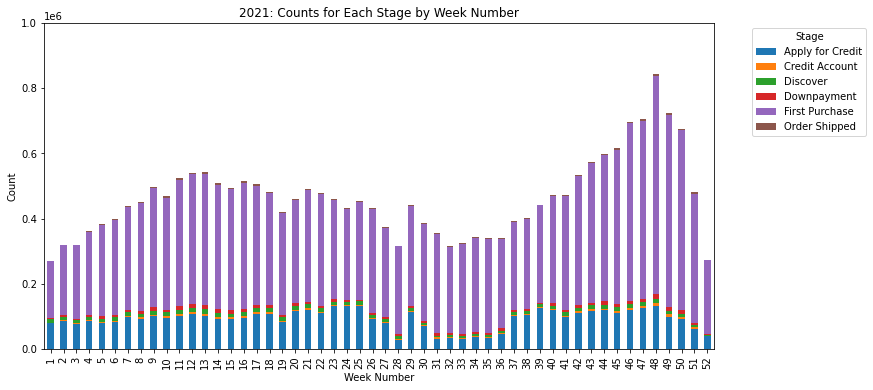

In [ ]:
bar2021 = subset_2021.groupby(['week_num', 'stage']).size().reset_index(name='count')
pivot_df = bar2021.pivot(index='week_num', columns='stage', values='count')
fig, ax = plt.subplots(figsize=(12, 6))
pivot_df.plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('Week Number')
ax.set_ylabel('Count')
ax.set_title('2021: Counts for Each Stage by Week Number')
ax.set_ylim(0, 1000000)
ax.legend(title='Stage', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Text(0.5, 1.0, '2021: Proportion of Various Milestones Relative to Order Shipped')

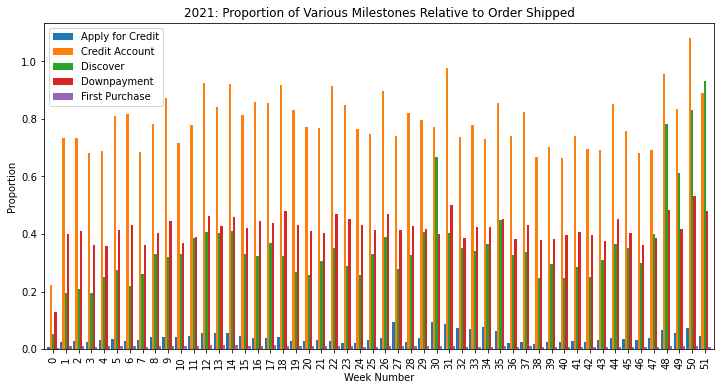

In [ ]:
oshipped_applyforcredit_2021 = bar2021[bar2021["stage"] == "Order Shipped"]["count"].values / bar2021[bar2021["stage"] == "Apply for Credit"]["count"].values
oshipped_firstpurchase_2021 = bar2021[bar2021["stage"] == "Order Shipped"]["count"].values / bar2021[bar2021["stage"] == "First Purchase"]["count"].values
oshipped_downpayment_2021 = bar2021[bar2021["stage"] == "Order Shipped"]["count"].values / bar2021[bar2021["stage"] == "Downpayment"]["count"].values
oshipped_discover_2021 = bar2021[bar2021["stage"] == "Order Shipped"]["count"].values / bar2021[bar2021["stage"] == "Discover"]["count"].values
oshipped_creditaccount_2021 = bar2021[bar2021["stage"] == "Order Shipped"]["count"].values / bar2021[bar2021["stage"] == "Credit Account"]["count"].values

new_df_2021 = pd.DataFrame([oshipped_applyforcredit_2021, oshipped_creditaccount_2021, oshipped_discover_2021, oshipped_downpayment_2021, oshipped_firstpurchase_2021])
new_df_2021 = new_df_2021.T
new_df_2021.columns = ["Apply for Credit", "Credit Account", "Discover", "Downpayment", "First Purchase"]

fig, ax = plt.subplots(figsize=(12, 6))
new_df_2021.plot(kind='bar', width = 0.9, ax=ax)
ax.set_xlabel('Week Number')
ax.set_ylabel('Proportion')
plt.title("2021: Proportion of Various Milestones Relative to Order Shipped")


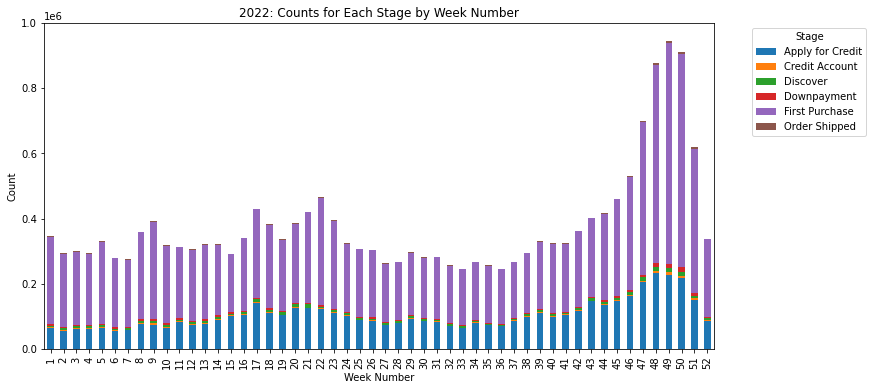

In [ ]:
bar2022 = subset_2022.groupby(['week_num', 'stage']).size().reset_index(name='count')
pivot_df = bar2022.pivot(index='week_num', columns='stage', values='count')
fig, ax = plt.subplots(figsize=(12, 6))
pivot_df.plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('Week Number')
ax.set_ylabel('Count')
ax.set_ylim(0, 1000000)
ax.set_title('2022: Counts for Each Stage by Week Number')
ax.legend(title='Stage', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Text(0.5, 1.0, '2022: Proportion of Various Milestones Relative to Order Shipped')

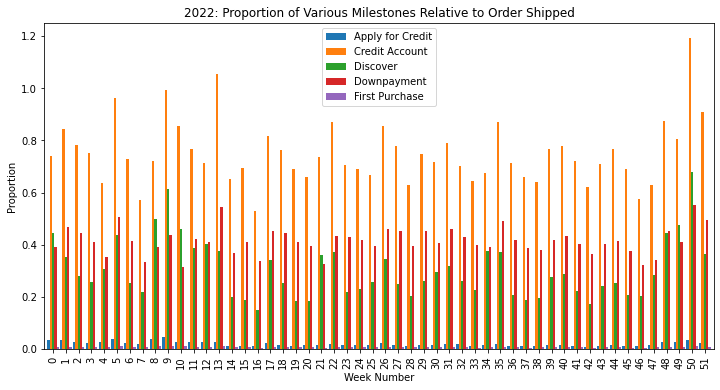

In [ ]:
oshipped_applyforcredit_2022 = bar2022[bar2022["stage"] == "Order Shipped"]["count"].values / bar2022[bar2022["stage"] == "Apply for Credit"]["count"].values
oshipped_firstpurchase_2022 = bar2022[bar2022["stage"] == "Order Shipped"]["count"].values / bar2022[bar2022["stage"] == "First Purchase"]["count"].values
oshipped_downpayment_2022 = bar2022[bar2022["stage"] == "Order Shipped"]["count"].values / bar2022[bar2022["stage"] == "Downpayment"]["count"].values
oshipped_discover_2022 = bar2022[bar2022["stage"] == "Order Shipped"]["count"].values / bar2022[bar2022["stage"] == "Discover"]["count"].values
oshipped_creditaccount_2022 = bar2022[bar2022["stage"] == "Order Shipped"]["count"].values / bar2022[bar2022["stage"] == "Credit Account"]["count"].values


new_df_2022 = pd.DataFrame([oshipped_applyforcredit_2022, oshipped_creditaccount_2022, oshipped_discover_2022, oshipped_downpayment_2022, oshipped_firstpurchase_2022])
new_df_2022 = new_df_2022.T
new_df_2022.columns = ["Apply for Credit", "Credit Account", "Discover", "Downpayment", "First Purchase"]

fig, ax = plt.subplots(figsize=(12, 6))
new_df_2022.plot(kind='bar', width = 0.9, ax=ax)
ax.set_xlabel('Week Number')
ax.set_ylabel('Proportion')
plt.title("2022: Proportion of Various Milestones Relative to Order Shipped")

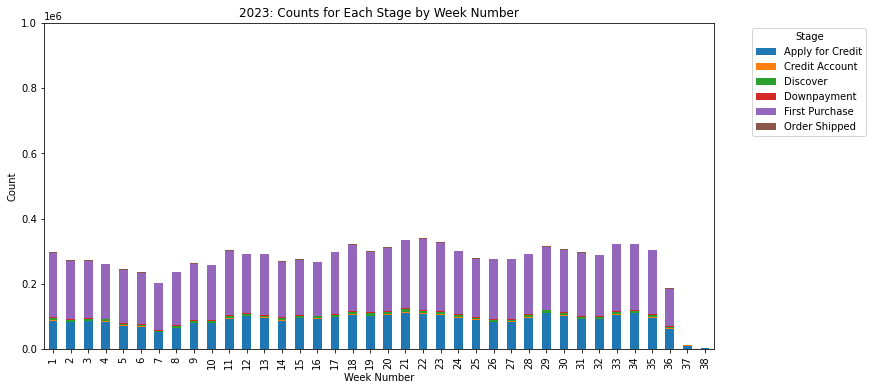

In [ ]:
bar2023 = subset_2023.groupby(['week_num', 'stage']).size().reset_index(name='count')
pivot_df = bar2023.pivot(index='week_num', columns='stage', values='count')
fig, ax = plt.subplots(figsize=(12, 6))
pivot_df.plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('Week Number')
ax.set_ylabel('Count')
ax.set_ylim(0, 1000000)
ax.set_title('2023: Counts for Each Stage by Week Number')
ax.legend(title='Stage', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Text(0.5, 1.0, '2023: Proportion of Various Milestones Relative to Order Shipped')

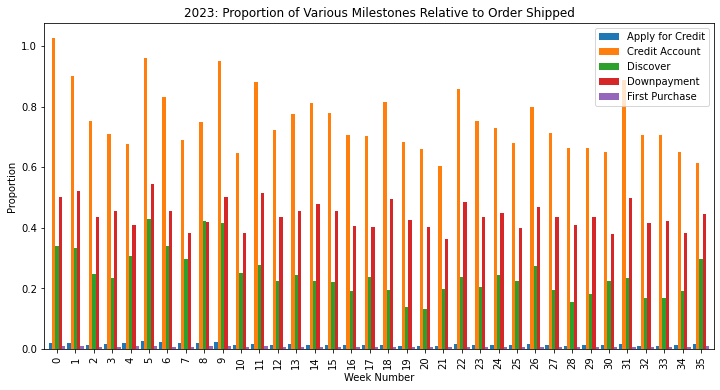

In [ ]:
bar2023 = bar2023[bar2023["week_num"] <= 36]
oshipped_applyforcredit_2023 = bar2023[bar2023["stage"] == "Order Shipped"]["count"].values / bar2023[bar2023["stage"] == "Apply for Credit"]["count"].values
oshipped_firstpurchase_2023 = bar2023[bar2023["stage"] == "Order Shipped"]["count"].values / bar2023[bar2023["stage"] == "First Purchase"]["count"].values
oshipped_downpayment_2023 = bar2023[bar2023["stage"] == "Order Shipped"]["count"].values / bar2023[bar2023["stage"] == "Downpayment"]["count"].values
oshipped_discover_2023 = bar2023[bar2023["stage"] == "Order Shipped"]["count"].values / bar2023[bar2023["stage"] == "Discover"]["count"].values
oshipped_creditaccount_2023 = bar2023[bar2023["stage"] == "Order Shipped"]["count"].values / bar2023[bar2023["stage"] == "Credit Account"]["count"].values


new_df_2023 = pd.DataFrame([oshipped_applyforcredit_2023, oshipped_creditaccount_2023, oshipped_discover_2023, oshipped_downpayment_2023, oshipped_firstpurchase_2023])
new_df_2023 = new_df_2023.T
new_df_2023.columns = ["Apply for Credit", "Credit Account", "Discover", "Downpayment", "First Purchase"]

fig, ax = plt.subplots(figsize=(12, 6))
new_df_2023.plot(kind='bar', width = 0.9, ax=ax)
ax.set_xlabel('Week Number')
ax.set_ylabel('Proportion')
plt.title("2023: Proportion of Various Milestones Relative to Order Shipped")

Zach's Logistic Regression:

In [ ]:
year_2021 = df[df["event_timestamp"].str[:4] == "2021"]
ed = pd.read_csv("Event Definitions.csv")
ed.rename(columns={'event_definition_id': 'ed_id'}, inplace=True)
df_2021_lr = pd.merge(year_2021, ed, on='ed_id', how='inner')
df_2021_lr


,customer_id,account_id,ed_id,event_name_x,event_timestamp,journey_steps_until_end,Year-Month,event_name_y,journey_id,milestone_number,stage
0,15849251,383997507,4,browse_products,2021-11-04T14:11:15.000Z,1,2021-11,browse_products,1,NaN,First Purchase
1,15849251,383997507,4,browse_products,2021-11-04T14:11:29.000Z,2,2021-11,browse_products,1,NaN,First Purchase
2,15849251,383997507,4,browse_products,2021-11-04T14:12:10.000Z,3,2021-11,browse_products,1,NaN,First Purchase
3,15849251,383997507,4,browse_products,2021-11-04T14:12:21.000Z,4,2021-11,browse_products,1,NaN,First Purchase
4,15849251,383997507,4,browse_products,2021-11-04T14:12:24.000Z,5,2021-11,browse_products,1,NaN,First Purchase
...,...,...,...,...,...,...,...,...,...,...,...
25467993,711594550,657063125,20,catalog_(email)_(experian),2021-11-29T00:00:00.000Z,1,2021-11,catalog_email_experian,1,NaN,Prospecting
25467994,2034956069,-1500217999,20,catalog_(email)_(experian),2021-11-29T00:00:00.000Z,1,2021-11,catalog_email_experian,1,NaN,Prospecting
25467995,503921736,1312969466,20,catalog_(email)_(experian),2021-11-29T00:00:00.000Z,1,2021-11,catalog_email_experian,1,NaN,Prospecting
25467996,-1792914060,-80857102,20,catalog_(email)_(experian),2021-11-29T00:00:00.000Z,1,2021-11,catalog_email_experian,1,NaN,Prospecting


In [ ]:
mask = ["customer_id", "stage"]
new_df = df_2021_lr[mask]
new_df

,customer_id,stage
0,15849251,First Purchase
1,15849251,First Purchase
2,15849251,First Purchase
3,15849251,First Purchase
4,15849251,First Purchase
...,...,...
25467993,711594550,Prospecting
25467994,2034956069,Prospecting
25467995,503921736,Prospecting
25467996,-1792914060,Prospecting


In [ ]:
binary_2021 = new_df.pivot_table(index = 'customer_id',
                    columns = 'stage',
                    aggfunc = np.count_nonzero,
                    fill_value = 0).astype(bool).astype(int).astype(str)
binary_2021

stage,Apply for Credit,Credit Account,Discover,Downpayment,First Purchase,Order Shipped,Prospecting
customer_id,,,,,,,
-2147483541,1,0,0,0,1,0,1
-2147474305,1,0,0,0,1,0,1
-2147466542,1,0,0,0,1,0,0
-2147459085,1,0,0,0,1,0,1
-2147454032,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...
2147471042,1,1,0,1,1,1,0
2147473559,1,0,1,0,1,0,1
2147475768,1,0,1,0,1,0,1


In [ ]:
values_2021 = new_df.pivot_table(index = 'customer_id',
                    columns = 'stage',
                    aggfunc = len,
                    fill_value = 0)
values_2021
values_2021 = values_2021[values_2021["Order Shipped"] < 2]

In [ ]:
X = binary_2021[['Apply for Credit', 'Credit Account', 'Discover', 'Downpayment', 'First Purchase', 'Prospecting']]
Y = binary_2021['Order Shipped']

In [ ]:
X_noDown = binary_2021[['Apply for Credit', 'Credit Account', 'Discover', 'First Purchase', 'Prospecting']]
Y_noDown = binary_2021['Order Shipped']

In [ ]:
X_noCredit = binary_2021[['Apply for Credit', 'Discover', 'Downpayment', 'First Purchase', 'Prospecting']]
Y_noCredit = binary_2021['Order Shipped']

In [ ]:
X_noDown_noCredit = binary_2021[['Apply for Credit', 'Discover', 'First Purchase', 'Prospecting']]
Y_noDown_noCredit = binary_2021['Order Shipped']

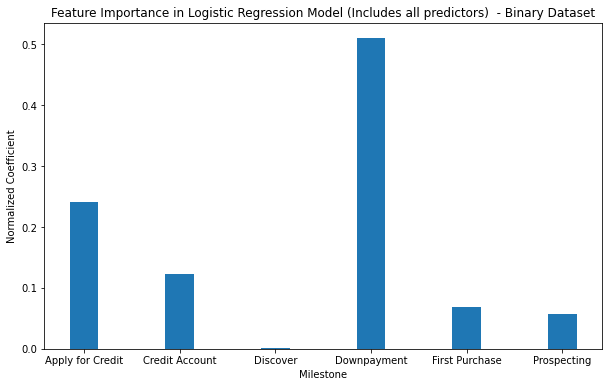

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
model = LogisticRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
coefficients = model.coef_[0]
normalized_coefficients = coefficients / sum(abs(coefficients))
feature_importance = abs(normalized_coefficients)

plt.figure(figsize=(10, 6))
plt.bar(range(len(coefficients)),feature_importance, tick_label = X.columns.tolist(), width = 0.3)
plt.xlabel('Milestone')
plt.ylabel('Normalized Coefficient')
plt.title('Feature Importance in Logistic Regression Model (Includes all predictors)  - Binary Dataset')
plt.show()


In [ ]:
print("Classification Report:")
print(classification_report(Y_test, Y_pred))
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    135228
           1       0.93      0.99      0.96     34848

    accuracy                           0.98    170076
   macro avg       0.96      0.99      0.98    170076
weighted avg       0.98      0.98      0.98    170076

Confusion Matrix:
[[132645   2583]
 [   235  34613]]


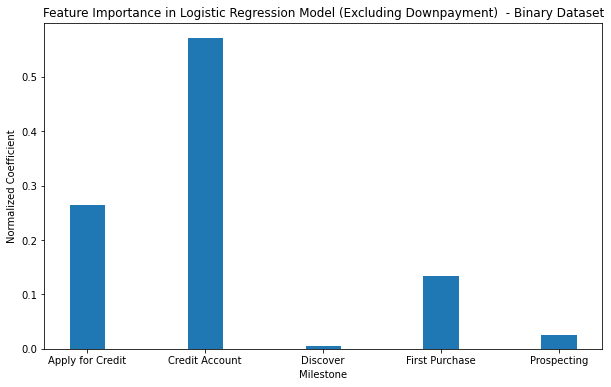

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_noDown, Y_noDown, test_size=0.2, random_state=1)
model = LogisticRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
coefficients = model.coef_[0]
normalized_coefficients = coefficients / sum(abs(coefficients))
feature_importance = abs(normalized_coefficients)

plt.figure(figsize=(10, 6))
plt.bar(range(len(coefficients)),feature_importance, tick_label = X_noDown.columns.tolist(), width =0.3)
plt.xlabel('Milestone')
plt.ylabel('Normalized Coefficient')
plt.title('Feature Importance in Logistic Regression Model (Excluding Downpayment)  - Binary Dataset')
plt.show()

In [ ]:
print("Classification Report:")
print(classification_report(Y_test, Y_pred))
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97    135228
           1       0.80      0.99      0.88     34848

    accuracy                           0.95    170076
   macro avg       0.90      0.96      0.92    170076
weighted avg       0.96      0.95      0.95    170076

Confusion Matrix:
[[126483   8745]
 [   379  34469]]


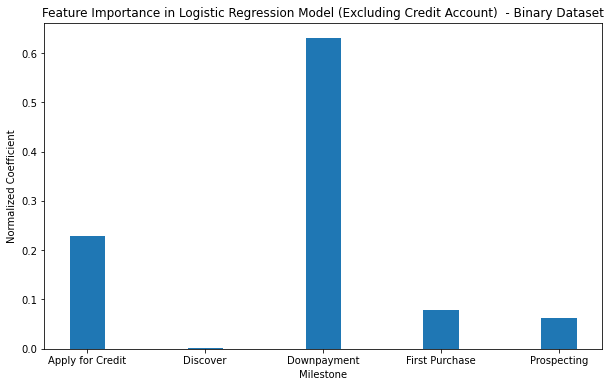

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_noCredit, Y_noCredit, test_size=0.2, random_state=1)
model = LogisticRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
coefficients = model.coef_[0]
normalized_coefficients = coefficients / sum(abs(coefficients))
feature_importance = abs(normalized_coefficients)

plt.figure(figsize=(10, 6))
plt.bar(range(len(coefficients)),feature_importance, tick_label = X_noCredit.columns.tolist(), width =0.3)
plt.xlabel('Milestone')
plt.ylabel('Normalized Coefficient')
plt.title('Feature Importance in Logistic Regression Model (Excluding Credit Account)  - Binary Dataset')
plt.show()

In [ ]:
print("Classification Report:")
print(classification_report(Y_test, Y_pred))
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    135228
           1       0.93      0.99      0.96     34848

    accuracy                           0.98    170076
   macro avg       0.96      0.99      0.98    170076
weighted avg       0.98      0.98      0.98    170076

Confusion Matrix:
[[132645   2583]
 [   235  34613]]


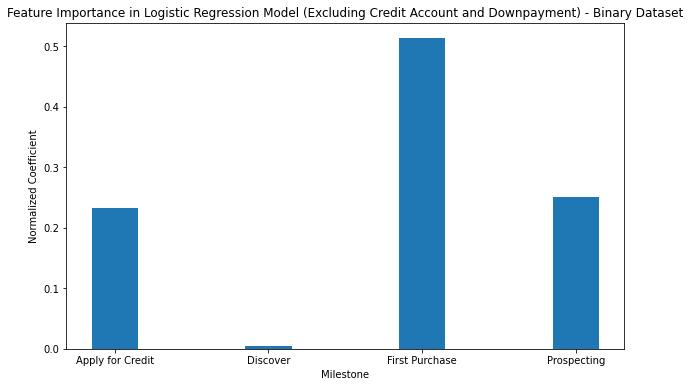

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_noDown_noCredit, Y_noDown_noCredit, test_size=0.2, random_state=1)
model = LogisticRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
coefficients = model.coef_[0]
normalized_coefficients = coefficients / sum(abs(coefficients))
feature_importance = abs(normalized_coefficients)

plt.figure(figsize=(10, 6))
plt.bar(range(len(coefficients)),feature_importance, tick_label = X_noDown_noCredit.columns.tolist(), width =0.3)
plt.xlabel('Milestone')
plt.ylabel('Normalized Coefficient')
plt.title('Feature Importance in Logistic Regression Model (Excluding Credit Account and Downpayment) - Binary Dataset')
plt.show()

In [ ]:
print("Classification Report:")
print(classification_report(Y_test, Y_pred))
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))

Classification Report:


/Users/marcgodick/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/marcgodick/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/marcgodick/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.80      1.00      0.89    135228
           1       0.00      0.00      0.00     34848

    accuracy                           0.80    170076
   macro avg       0.40      0.50      0.44    170076
weighted avg       0.63      0.80      0.70    170076

Confusion Matrix:
[[135228      0]
 [ 34848      0]]


In [ ]:
X = values_2021[['Apply for Credit', 'Credit Account', 'Discover', 'Downpayment', 'First Purchase', 'Prospecting']]
Y = values_2021['Order Shipped']

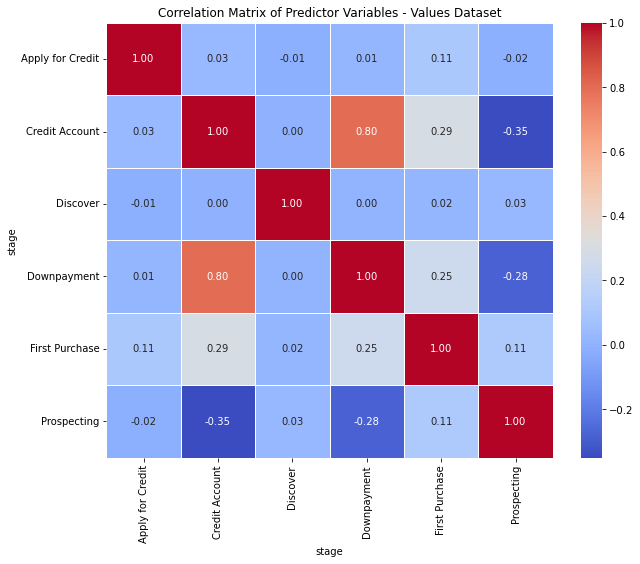

In [ ]:
corr_matrix = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Predictor Variables - Values Dataset')
plt.show()

In [ ]:
X_noDown = values_2021[['Apply for Credit', 'Credit Account', 'Discover', 'First Purchase', 'Prospecting']]
Y_noDown = values_2021['Order Shipped']

In [ ]:
X_noCredit = values_2021[['Apply for Credit', 'Discover', 'Downpayment', 'First Purchase', 'Prospecting']]
Y_noCredit = values_2021['Order Shipped']

In [ ]:
X_noDown_noCredit = values_2021[['Apply for Credit', 'Discover', 'First Purchase', 'Prospecting']]
Y_noDown_noCredit = values_2021['Order Shipped']

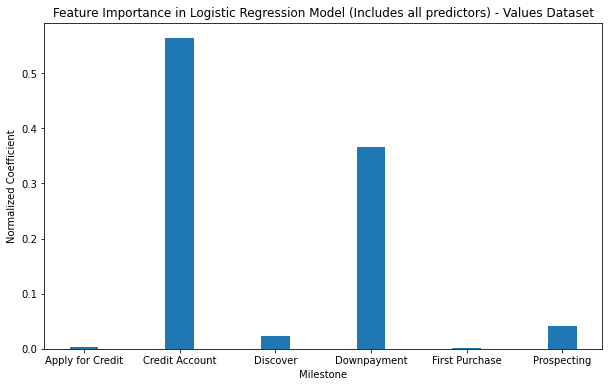

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
model = LogisticRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
coefficients = model.coef_[0]
normalized_coefficients = coefficients / sum(abs(coefficients))
feature_importance = abs(normalized_coefficients)

plt.figure(figsize=(10, 6))
plt.bar(range(len(coefficients)),feature_importance, tick_label = X.columns.tolist(), width = 0.3)
plt.xlabel('Milestone')
plt.ylabel('Normalized Coefficient')
plt.title('Feature Importance in Logistic Regression Model (Includes all predictors) - Values Dataset')
plt.show()

In [ ]:
print("Classification Report:")
print(classification_report(Y_test, Y_pred))
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99    135225
           1       0.94      0.98      0.96     34826

    accuracy                           0.98    170051
   macro avg       0.97      0.98      0.97    170051
weighted avg       0.98      0.98      0.98    170051

Confusion Matrix:
[[132938   2287]
 [   706  34120]]


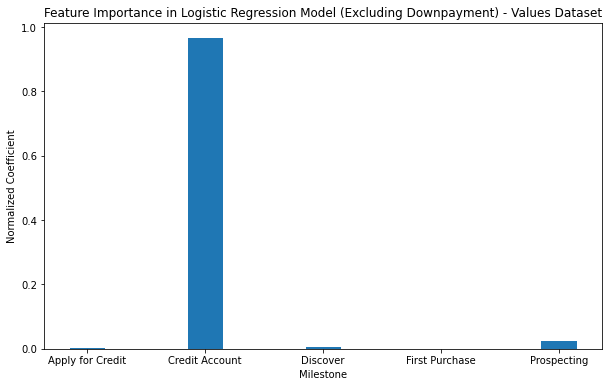

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_noDown, Y_noDown, test_size=0.2, random_state=1)
model = LogisticRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
coefficients = model.coef_[0]
normalized_coefficients = coefficients / sum(abs(coefficients))
feature_importance = abs(normalized_coefficients)

plt.figure(figsize=(10, 6))
plt.bar(range(len(coefficients)),feature_importance, tick_label = X_noDown.columns.tolist(), width = 0.3)
plt.xlabel('Milestone')
plt.ylabel('Normalized Coefficient')
plt.title('Feature Importance in Logistic Regression Model (Excluding Downpayment) - Values Dataset')
plt.savefig('FeatureImportanceNoD.pdf')

plt.show()

In [ ]:
print("Classification Report:")
print(classification_report(Y_test, Y_pred))
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96    135225
           1       0.79      0.99      0.88     34826

    accuracy                           0.95    170051
   macro avg       0.90      0.96      0.92    170051
weighted avg       0.96      0.95      0.95    170051

Confusion Matrix:
[[126282   8943]
 [   279  34547]]


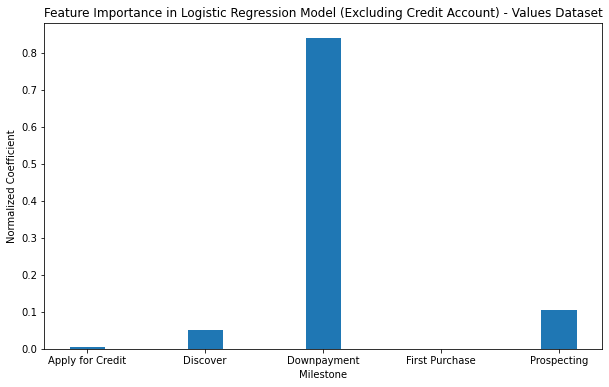

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_noCredit, Y_noCredit, test_size=0.2, random_state=1)
model = LogisticRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
coefficients = model.coef_[0]
normalized_coefficients = coefficients / sum(abs(coefficients))
feature_importance = abs(normalized_coefficients)

plt.figure(figsize=(10, 6))
plt.bar(range(len(coefficients)),feature_importance, tick_label = X_noCredit.columns.tolist(), width = 0.3)
plt.xlabel('Milestone')
plt.ylabel('Normalized Coefficient')
plt.title('Feature Importance in Logistic Regression Model (Excluding Credit Account) - Values Dataset')
plt.savefig('FeatureImportanceNoC.pdf')

plt.show()

In [ ]:
print("Classification Report:")
print(classification_report(Y_test, Y_pred))
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98    135225
           1       0.95      0.93      0.94     34826

    accuracy                           0.98    170051
   macro avg       0.97      0.96      0.96    170051
weighted avg       0.98      0.98      0.98    170051

Confusion Matrix:
[[133581   1644]
 [  2445  32381]]


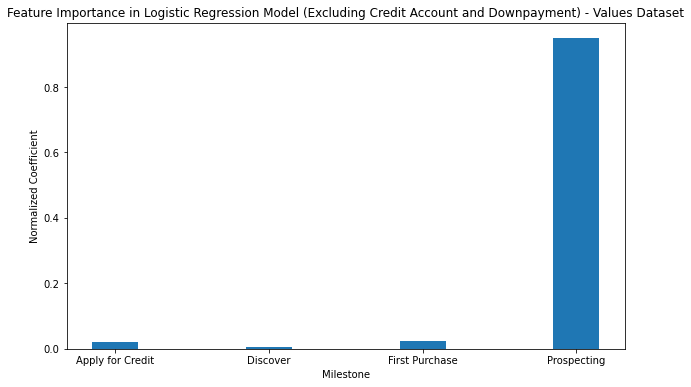

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_noDown_noCredit, Y_noDown_noCredit, test_size=0.2, random_state=1)
model = LogisticRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
coefficients = model.coef_[0]
normalized_coefficients = coefficients / sum(abs(coefficients))
feature_importance = abs(normalized_coefficients)

plt.figure(figsize=(10, 6))
plt.bar(range(len(coefficients)),feature_importance, tick_label = X_noDown_noCredit.columns.tolist(), width = 0.3)
plt.xlabel('Milestone')
plt.ylabel('Normalized Coefficient')
plt.title('Feature Importance in Logistic Regression Model (Excluding Credit Account and Downpayment) - Values Dataset')
plt.savefig('FeatureImportanceNoCNoD.pdf')
plt.show()

In [ ]:
print("Classification Report:")
print(classification_report(Y_test, Y_pred))
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89    135225
           1       0.61      0.20      0.30     34826

    accuracy                           0.81    170051
   macro avg       0.72      0.58      0.60    170051
weighted avg       0.78      0.81      0.77    170051

Confusion Matrix:
[[130755   4470]
 [ 27838   6988]]


# Question 3 (Charles)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#path = "/content/drive/MyDrive/Undergraduate/Senior/Stats M148/export.csv"
chunk = pd.read_csv("export.csv", chunksize = 1000000)
pd_df = pd.concat(chunk)

In [ ]:
pd_df.head(2000015)

,customer_id,account_id,ed_id,event_name,event_timestamp,journey_steps_until_end
0,-784961211,1773350293,12,application_web_approved,2023-03-22T08:45:22.000Z,1
1,-784961211,1773350293,19,application_web_view,2023-03-22T13:32:10.000Z,2
2,-784961211,1773350293,19,application_web_view,2023-03-22T13:32:10.000Z,3
3,-784961211,1773350293,19,application_web_view,2023-03-22T13:32:10.000Z,4
4,-784961211,1773350293,19,application_web_view,2023-03-22T13:32:10.000Z,5
...,...,...,...,...,...,...
2000010,-1543524884,-2098483245,4,browse_products,2021-06-26T06:33:00.000Z,94
2000011,-1543524884,-2098483245,4,browse_products,2021-06-26T06:36:34.000Z,95
2000012,-1543524884,-2098483245,29,account_activitation,2021-06-27T00:00:00.000Z,96
2000013,-1543524884,-2098483245,27,account_downpaymentcleared,2021-06-28T00:00:00.000Z,97


In [ ]:
pd_df_credit = pd_df[pd_df['event_name'] == "account_activitation"]

In [ ]:
pd_df_credit.loc[:, 'date'] = pd_df_credit['event_timestamp'].str.slice(0, 10)

C:\Users\cchba\anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


C:\Users\cchba\AppData\Local\Temp/ipykernel_25548/2655999989.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_df_credit['date'] = pd.to_datetime(pd_df_credit['date'])


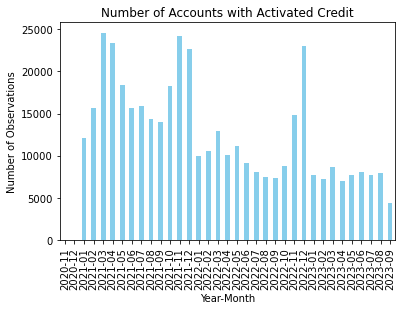

In [ ]:
pd_df_credit
pd_df_credit['date'] = pd.to_datetime(pd_df_credit['date'])

# Count the number of observations for each date
pd_df_credit.loc[:,'YearMonth'] = pd_df_credit['date'].dt.to_period('M')

# Count the number of observations for each month and year
date_counts = pd_df_credit['YearMonth'].value_counts().sort_index()

# Plot the bar chart
date_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Year-Month')
plt.ylabel('Number of Observations')
plt.title('Number of Accounts with Activated Credit')
plt.show()

In [ ]:
pd_df_ordered = pd_df[pd_df['event_name'] == "order_shipped"]
pd_df_ordered.loc[:,'date'] = pd_df_ordered['event_timestamp'].str.slice(0, 10)
pd_df_ordered['date'] = pd.to_datetime(pd_df_ordered['date'])

C:\Users\cchba\AppData\Local\Temp/ipykernel_25548/1943807961.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_df_ordered['date'] = pd.to_datetime(pd_df_ordered['date'])


In [ ]:
pd_df_ordered

,customer_id,account_id,ed_id,event_name,event_timestamp,journey_steps_until_end,date
394,-1257367741,1076891306,28,order_shipped,2023-01-17T00:00:00.000Z,45,2023-01-17
639,1406169052,-405387821,28,order_shipped,2021-06-01T00:00:00.000Z,8,2021-06-01
736,1035317138,420663751,28,order_shipped,2023-03-08T00:00:00.000Z,80,2023-03-08
812,1621825105,1696883893,28,order_shipped,2022-06-17T00:00:00.000Z,76,2022-06-17
838,1896716214,-1415717586,28,order_shipped,2021-12-23T00:00:00.000Z,10,2021-12-23
...,...,...,...,...,...,...,...
64911166,-302698866,-1678926520,28,order_shipped,2023-08-01T00:00:00.000Z,14,2023-08-01
64911246,-198897829,-1258618150,28,order_shipped,2023-08-19T00:00:00.000Z,76,2023-08-19
64911403,-1110957371,-548411925,28,order_shipped,2023-09-05T00:00:00.000Z,36,2023-09-05
64911436,-721017154,-2147279424,28,order_shipped,2023-08-29T00:00:00.000Z,33,2023-08-29


C:\Users\cchba\AppData\Local\Temp/ipykernel_25548/4257255271.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_df_ordered['date'] = pd.to_datetime(pd_df_ordered['date'])
C:\Users\cchba\AppData\Local\Temp/ipykernel_25548/4257255271.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_df_ordered['YearMonth'] = pd_df_ordered['date'].dt.to_period('M')


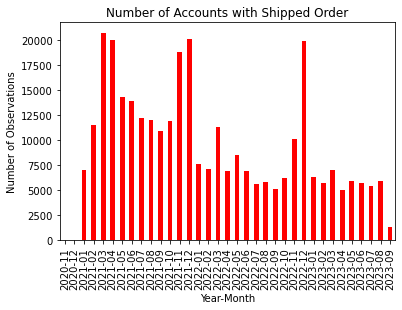

In [ ]:
pd_df_ordered
pd_df_ordered['date'] = pd.to_datetime(pd_df_ordered['date'])

# Count the number of observations for each date
pd_df_ordered['YearMonth'] = pd_df_ordered['date'].dt.to_period('M')

# Count the number of observations for each month and year
date_counts2 = pd_df_ordered['YearMonth'].value_counts().sort_index()

# Plot the bar chart
date_counts2.plot(kind='bar', color='red')
plt.xlabel('Year-Month')
plt.ylabel('Number of Observations')
plt.title('Number of Accounts with Shipped Order')
plt.show()

In [ ]:
pd_df_downpayment = pd_df[pd_df['event_name'] == "account_downpaymentcleared"]
pd_df_downpayment['date'] = pd_df_downpayment['event_timestamp'].str.slice(0, 10)
pd_df_downpayment['date'] = pd.to_datetime(pd_df_downpayment['date'])

C:\Users\cchba\AppData\Local\Temp/ipykernel_25548/2544718955.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_df_downpayment['date'] = pd_df_downpayment['event_timestamp'].str.slice(0, 10)
C:\Users\cchba\AppData\Local\Temp/ipykernel_25548/2544718955.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_df_downpayment['date'] = pd.to_datetime(pd_df_downpayment['date'])


C:\Users\cchba\AppData\Local\Temp/ipykernel_25548/841831028.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_df_downpayment['date'] = pd.to_datetime(pd_df_downpayment['date'])
C:\Users\cchba\AppData\Local\Temp/ipykernel_25548/841831028.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_df_downpayment['YearMonth'] = pd_df_downpayment['date'].dt.to_period('M')


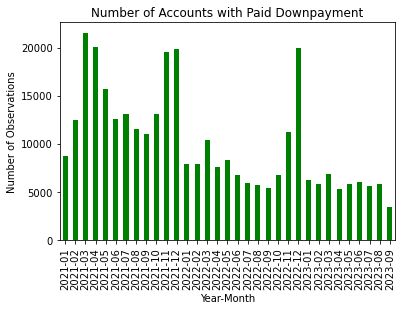

In [ ]:
pd_df_downpayment
pd_df_downpayment['date'] = pd.to_datetime(pd_df_downpayment['date'])

# Count the number of observations for each date
pd_df_downpayment['YearMonth'] = pd_df_downpayment['date'].dt.to_period('M')

# Count the number of observations for each month and year
date_counts3 = pd_df_downpayment['YearMonth'].value_counts().sort_index()

# Plot the bar chart
date_counts3.plot(kind='bar', color='green')
plt.xlabel('Year-Month')
plt.ylabel('Number of Observations')
plt.title('Number of Accounts with Paid Downpayment')
plt.show()

In [ ]:
pd_df_applied1 = pd_df[pd_df['ed_id'] == 15]
pd_df_applied2 = pd_df[pd_df['ed_id'] == 12]
pd_df_applied = pd.concat([pd_df_applied1, pd_df_applied2], axis=0)
pd_df_applied['date'] = pd_df_applied['event_timestamp'].str.slice(0, 10)
pd_df_applied['date'] = pd.to_datetime(pd_df_applied['date'])

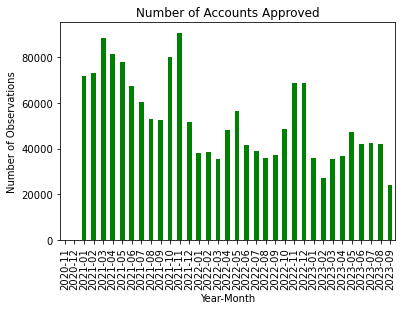

In [ ]:
pd_df_applied['YearMonth'] = pd_df_applied['date'].dt.to_period('M')

# Count the number of observations for each month and year
date_counts4 = pd_df_applied['YearMonth'].value_counts().sort_index()

# Plot the bar chart
date_counts4.plot(kind='bar', color='green')
plt.xlabel('Year-Month')
plt.ylabel('Number of Observations')
plt.title('Number of Accounts Approved')
plt.show()

In [ ]:
date_counts / date_counts4

2020-11    2.000000
2020-12    5.000000
2021-01    0.167955
2021-02    0.213918
2021-03    0.277722
2021-04    0.286527
2021-05    0.235721
2021-06    0.232377
2021-07    0.262772
2021-08    0.269186
2021-09    0.267658
2021-10    0.227985
2021-11    0.266123
2021-12    0.438226
2022-01    0.261994
2022-02    0.273925
2022-03    0.365814
2022-04    0.208245
2022-05    0.197025
2022-06    0.219098
2022-07    0.207438
2022-08    0.209736
2022-09    0.196519
2022-10    0.181164
2022-11    0.215633
2022-12    0.334044
2023-01    0.215108
2023-02    0.268654
2023-03    0.243261
2023-04    0.191447
2023-05    0.163030
2023-06    0.191825
2023-07    0.182829
2023-08    0.187466
2023-09    0.184324
Freq: M, Name: YearMonth, dtype: float64

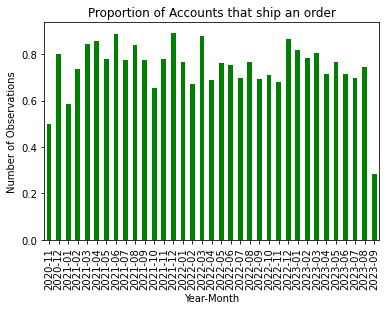

In [ ]:
shipped_counts = date_counts2 / date_counts
shipped_counts.plot(kind='bar', color='green')
plt.xlabel('Year-Month')
plt.ylabel('Number of Observations')
plt.title('Proportion of Accounts that ship an order')
plt.show()

In [ ]:
shipped_counts

2020-11    0.500000
2020-12    0.800000
2021-01    0.583589
2021-02    0.736076
2021-03    0.844529
2021-04    0.858831
2021-05    0.777693
2021-06    0.885876
2021-07    0.772939
2021-08    0.839827
2021-09    0.775176
2021-10    0.653190
2021-11    0.778206
2021-12    0.891872
2022-01    0.766392
2022-02    0.672542
2022-03    0.877031
2022-04    0.688476
2022-05    0.761472
2022-06    0.754818
2022-07    0.698774
2022-08    0.767909
2022-09    0.694871
2022-10    0.710008
2022-11    0.681277
2022-12    0.864641
2023-01    0.817959
2023-02    0.781816
2023-03    0.804681
2023-04    0.715404
2023-05    0.768315
2023-06    0.715191
2023-07    0.695573
2023-08    0.744489
2023-09    0.284323
Freq: M, Name: YearMonth, dtype: float64

In [ ]:
print(shipped_counts.describe())

count    35.000000
mean      0.741822
std       0.115439
min       0.284323
25%       0.697174
50%       0.766392
75%       0.802341
max       0.891872
Name: YearMonth, dtype: float64


In [ ]:
pd_df_credit['date'].dt.month

392         1
622         5
634         5
722         3
798         6
           ..
64911493    8
64911600    8
64911687    8
64911718    9
64911901    5
Name: date, Length: 418774, dtype: int64

In [ ]:
date_string = '2023-03-05T16:33:59.000Z'
date_string2 = "2022-04-01T14:59:48.547Z"
# Convert the string to a datetime object
date_time_format = pd.to_datetime(date_string, format='%Y-%m-%dT%H:%M:%S.%fZ')
date_time_format2 = pd.to_datetime(date_string2, format='%Y-%m-%dT%H:%M:%S.%fZ')

print(date_time_format - date_time_format2)

338 days 01:34:10.453000


In [ ]:
pd_df_head = pd_df.head(2000015)
pd_df_head

# Sorting the DataFrame by the column for which you want to keep the highest value
pd_df_head.sort_values(by='journey_steps_until_end', ascending=True, inplace=True)

# Dropping duplicates based on all columns except the one used for sorting
pd_df_head.drop_duplicates(subset=['customer_id', 'account_id', "ed_id", "event_name", "event_timestamp"], keep='last', inplace=True)

# Resetting index if needed
#pd_df_head.reset_index(drop=True, inplace=True)
pd_df_head.sort_values(by=['customer_id', 'account_id'], ascending=True, inplace=True)

# Displaying the resulting DataFrame
pd_df_head


C:\Users\cchba\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,customer_id,account_id,ed_id,event_name,event_timestamp,journey_steps_until_end
1384088,-2147447248,-67670867,19,application_web_view,2022-08-22T15:08:05.000Z,1
1384089,-2147447248,-67670867,19,application_web_view,2022-08-22T15:08:53.000Z,2
1384090,-2147447248,-67670867,19,application_web_view,2022-08-22T15:09:08.000Z,3
1384091,-2147447248,-67670867,19,application_web_view,2022-08-22T15:09:10.000Z,4
1384092,-2147447248,-67670867,19,application_web_view,2022-08-22T15:09:11.000Z,5
...,...,...,...,...,...,...
1234912,2147480182,-1286764612,24,campaignemail_clicked,2023-06-22T23:39:49.000Z,10
1234913,2147480182,-1286764612,24,campaignemail_clicked,2023-06-22T23:40:27.000Z,11
1234914,2147480182,-1286764612,24,campaignemail_clicked,2023-06-22T23:40:48.000Z,12
1234915,2147480182,-1286764612,24,campaignemail_clicked,2023-06-22T23:41:04.000Z,13


In [ ]:
#print(pd_df_head[pd_df_head['ed_id'] == 29])
print(pd_df_head[pd_df_head['ed_id'] == 28])
#pd_df_head['event_timestamp']
ed_id_28 = pd_df_head[pd_df_head['ed_id'] == 28]
ed_id_28["date_time"] = pd.to_datetime(ed_id_28["event_timestamp"], format='%Y-%m-%dT%H:%M:%S.%fZ')
ed_id_28
ed_id_29 = pd_df_head[pd_df_head['ed_id'] == 29]
ed_id_29["date_time"] = pd.to_datetime(ed_id_29["event_timestamp"], format='%Y-%m-%dT%H:%M:%S.%fZ')
ed_id_29
print(ed_id_29[["customer_id", "date_time"]])
print(ed_id_28[["customer_id", "date_time"]])

         customer_id  account_id  ed_id     event_name  \
1467639  -2147425125   221594945     28  order_shipped   
1981101  -2146993185  -118642405     28  order_shipped   
1305898  -2145685456  2022544860     28  order_shipped   
1200182  -2144395759  -611381633     28  order_shipped   
549076   -2144211906  1156084559     28  order_shipped   
...              ...         ...    ...            ...   
1764256   2146229452 -1277509110     28  order_shipped   
53427     2146406955 -1661471236     28  order_shipped   
837350    2146511357   -37667090     28  order_shipped   
2737      2146586206  1176399212     28  order_shipped   
251354    2147441007  2011458405     28  order_shipped   

                  event_timestamp  journey_steps_until_end  
1467639  2021-10-01T00:00:00.000Z                       33  
1981101  2021-09-23T00:00:00.000Z                       67  
1305898  2023-05-02T00:00:00.000Z                       30  
1200182  2023-04-11T00:00:00.000Z                       42 

C:\Users\cchba\AppData\Local\Temp/ipykernel_25548/1719588366.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ed_id_28["date_time"] = pd.to_datetime(ed_id_28["event_timestamp"], format='%Y-%m-%dT%H:%M:%S.%fZ')
C:\Users\cchba\AppData\Local\Temp/ipykernel_25548/1719588366.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ed_id_29["date_time"] = pd.to_datetime(ed_id_29["event_timestamp"], format='%Y-%m-%dT%H:%M:%S.%fZ')


In [ ]:
ed_id_28

,customer_id,account_id,ed_id,event_name,event_timestamp,journey_steps_until_end,date_time
1467639,-2147425125,221594945,28,order_shipped,2021-10-01T00:00:00.000Z,33,2021-10-01
1981101,-2146993185,-118642405,28,order_shipped,2021-09-23T00:00:00.000Z,67,2021-09-23
1305898,-2145685456,2022544860,28,order_shipped,2023-05-02T00:00:00.000Z,30,2023-05-02
1200182,-2144395759,-611381633,28,order_shipped,2023-04-11T00:00:00.000Z,42,2023-04-11
549076,-2144211906,1156084559,28,order_shipped,2021-03-24T00:00:00.000Z,38,2021-03-24
...,...,...,...,...,...,...,...
1764256,2146229452,-1277509110,28,order_shipped,2021-04-20T00:00:00.000Z,12,2021-04-20
53427,2146406955,-1661471236,28,order_shipped,2021-03-03T00:00:00.000Z,137,2021-03-03
837350,2146511357,-37667090,28,order_shipped,2021-11-10T00:00:00.000Z,5,2021-11-10
2737,2146586206,1176399212,28,order_shipped,2023-06-24T00:00:00.000Z,48,2023-06-24


In [ ]:
ed_id_29

,customer_id,account_id,ed_id,event_name,event_timestamp,journey_steps_until_end,date_time
1467630,-2147425125,221594945,29,account_activitation,2021-09-29T00:00:00.000Z,24,2021-09-29
1981098,-2146993185,-118642405,29,account_activitation,2021-09-20T00:00:00.000Z,64,2021-09-20
452181,-2146746401,1121284416,29,account_activitation,2021-07-19T00:00:00.000Z,28,2021-07-19
1305073,-2146282540,1704826181,29,account_activitation,2023-01-17T00:00:00.000Z,33,2023-01-17
1305871,-2145685456,2022544860,29,account_activitation,2023-04-28T00:00:00.000Z,3,2023-04-28
...,...,...,...,...,...,...,...
53425,2146406955,-1661471236,29,account_activitation,2021-02-28T00:00:00.000Z,135,2021-02-28
837348,2146511357,-37667090,29,account_activitation,2021-11-07T00:00:00.000Z,3,2021-11-07
2722,2146586206,1176399212,29,account_activitation,2023-06-22T00:00:00.000Z,33,2023-06-22
568465,2146586921,-921687896,29,account_activitation,2021-03-31T00:00:00.000Z,1,2021-03-31


In [ ]:
df_merged = pd.merge(ed_id_29, ed_id_28, how='left', on=['customer_id','account_id'])
df_merged = df_merged.sort_values(by=['customer_id','account_id'])
df_merged

,customer_id,account_id,ed_id_x,event_name_x,event_timestamp_x,journey_steps_until_end_x,date_time_x,ed_id_y,event_name_y,event_timestamp_y,journey_steps_until_end_y,date_time_y
0,-2147425125,221594945,29,account_activitation,2021-09-29T00:00:00.000Z,24,2021-09-29,28.0,order_shipped,2021-10-01T00:00:00.000Z,33.0,2021-10-01
1,-2146993185,-118642405,29,account_activitation,2021-09-20T00:00:00.000Z,64,2021-09-20,28.0,order_shipped,2021-09-23T00:00:00.000Z,67.0,2021-09-23
2,-2146746401,1121284416,29,account_activitation,2021-07-19T00:00:00.000Z,28,2021-07-19,NaN,NaN,NaN,NaN,NaT
3,-2146282540,1704826181,29,account_activitation,2023-01-17T00:00:00.000Z,33,2023-01-17,NaN,NaN,NaN,NaN,NaT
4,-2145685456,2022544860,29,account_activitation,2023-04-28T00:00:00.000Z,3,2023-04-28,28.0,order_shipped,2023-05-02T00:00:00.000Z,30.0,2023-05-02
...,...,...,...,...,...,...,...,...,...,...,...,...
12684,2146406955,-1661471236,29,account_activitation,2021-02-28T00:00:00.000Z,135,2021-02-28,28.0,order_shipped,2021-03-03T00:00:00.000Z,137.0,2021-03-03
12685,2146511357,-37667090,29,account_activitation,2021-11-07T00:00:00.000Z,3,2021-11-07,28.0,order_shipped,2021-11-10T00:00:00.000Z,5.0,2021-11-10
12686,2146586206,1176399212,29,account_activitation,2023-06-22T00:00:00.000Z,33,2023-06-22,28.0,order_shipped,2023-06-24T00:00:00.000Z,48.0,2023-06-24
12687,2146586921,-921687896,29,account_activitation,2021-03-31T00:00:00.000Z,1,2021-03-31,NaN,NaN,NaN,NaN,NaT


In [ ]:
df_merged["ed_id_y"].isnull().sum()
#plt.plot()
print(10011/12689)
two_col = df_merged[['ed_id_x', 'ed_id_y']]
two_col.rename(columns={'ed_id_x': 'Activated Credit', 'ed_id_y': 'Order Shipped'}, inplace=True)
two_col

0.7889510599732051


C:\Users\cchba\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Activated Credit,Order Shipped
0,29,28.0
1,29,28.0
2,29,NaN
3,29,NaN
4,29,28.0
...,...,...
12684,29,28.0
12685,29,28.0
12686,29,28.0
12687,29,NaN


C:\Users\cchba\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


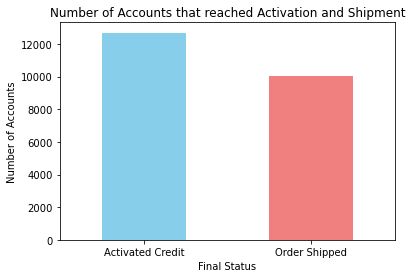

In [ ]:
two_col = df_merged[['ed_id_x', 'ed_id_y']]
two_col.rename(columns={'ed_id_x': 'Activated Credit', 'ed_id_y': 'Order Shipped'}, inplace=True)
two_col.notnull().sum()
two_col_count = two_col.notnull().sum()
# Plot a bar plot comparing the number of non-null observations between 'Age' and 'Salary'
two_col_count.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Number of Accounts that reached Activation and Shipment')
plt.xlabel('Final Status')
plt.ylabel('Number of Accounts')
plt.xticks(rotation=0)
plt.show()

In [ ]:
no_null_rows = df_merged[df_merged.notna().all(axis=1)]
no_null_rows['time_between'] = no_null_rows['date_time_y'] - no_null_rows['date_time_x']
print(no_null_rows['time_between'].describe())

count                         10011
mean      7 days 15:04:28.624513035
std      20 days 23:36:05.073828664
min                 0 days 00:00:00
25%                 3 days 00:00:00
50%                 4 days 00:00:00
75%                 5 days 00:00:00
max               354 days 00:00:00
Name: time_between, dtype: object


C:\Users\cchba\AppData\Local\Temp/ipykernel_25548/1189412759.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_null_rows['time_between'] = no_null_rows['date_time_y'] - no_null_rows['date_time_x']


In [ ]:
num_unique_df_head = pd_df.head(2000015)
unique_pairs = ~num_unique_df_head.duplicated(subset=['customer_id','account_id'], keep=False)
result_df = num_unique_df_head[unique_pairs]

# Display the result
result_df

,customer_id,account_id,ed_id,event_name,event_timestamp,journey_steps_until_end
288,1483781929,-47514109,12,application_web_approved,2023-09-18T09:50:48.000Z,1
529,-622988496,1706811051,15,application_phone_approved,2022-07-26T14:21:23.000Z,1
860,-1554036291,-1199609206,15,application_phone_approved,2021-09-05T18:54:04.000Z,1
2485,-1936991,-6594623,15,application_phone_approved,2023-08-17T18:45:37.000Z,1
4727,-1575784989,774175744,15,application_phone_approved,2023-06-27T15:34:13.000Z,1
...,...,...,...,...,...,...
1926176,1107859915,779110645,12,application_web_approved,2023-09-17T18:59:38.000Z,1
1929960,534165812,-35306894,15,application_phone_approved,2022-12-16T08:52:47.000Z,1
1960816,969989347,1010050149,12,application_web_approved,2023-09-15T06:23:26.000Z,1
1968898,-373572688,-517033244,12,application_web_approved,2023-09-15T18:57:01.000Z,1


In [ ]:
#pd_df2 = pd_df.drop_duplicates(subset=['customer_id', 'account_id', 'ed_id', 'event_name', 'event_timestamp'], keep='last')

In [ ]:
#pd_df2

In [ ]:
pd_df3 = pd_df.drop_duplicates(subset=['customer_id', 'account_id', 'ed_id', 'event_name', 'event_timestamp'], keep='first')

In [ ]:
pd_df3

,customer_id,account_id,ed_id,event_name,event_timestamp,journey_steps_until_end
0,-784961211,1773350293,12,application_web_approved,2023-03-22T08:45:22.000Z,1
1,-784961211,1773350293,19,application_web_view,2023-03-22T13:32:10.000Z,2
14,-784961211,1773350293,3,application_web_submit,2023-03-22T13:32:10.000Z,15
15,-784961211,1773350293,2,campaign_click,2023-03-22T14:45:22.000Z,16
16,-784961211,1773350293,19,application_web_view,2023-07-27T14:57:56.000Z,17
...,...,...,...,...,...,...
64911901,-865005459,-983311387,29,account_activitation,2021-05-14T00:00:00.000Z,40
64911902,-865005459,-983311387,5,view_cart,2021-05-15T09:27:47.000Z,41
64911903,-865005459,-983311387,24,campaignemail_clicked,2021-05-15T14:27:33.000Z,42
64911904,-865005459,-983311387,27,account_downpaymentcleared,2021-05-16T00:00:00.000Z,43


In [ ]:
pd_df3.head(50)

,customer_id,account_id,ed_id,event_name,event_timestamp,journey_steps_until_end
0,-784961211,1773350293,12,application_web_approved,2023-03-22T08:45:22.000Z,1
1,-784961211,1773350293,19,application_web_view,2023-03-22T13:32:10.000Z,2
14,-784961211,1773350293,3,application_web_submit,2023-03-22T13:32:10.000Z,15
15,-784961211,1773350293,2,campaign_click,2023-03-22T14:45:22.000Z,16
16,-784961211,1773350293,19,application_web_view,2023-07-27T14:57:56.000Z,17
21,-784961211,1773350293,19,application_web_view,2023-08-29T16:01:06.000Z,22
24,15849251,383997507,4,browse_products,2021-11-04T14:11:15.000Z,1
25,15849251,383997507,4,browse_products,2021-11-04T14:11:29.000Z,2
26,15849251,383997507,4,browse_products,2021-11-04T14:12:10.000Z,3
27,15849251,383997507,4,browse_products,2021-11-04T14:12:21.000Z,4


In [ ]:
pd_df3['event_timestamp'] = pd_df3['event_timestamp'].str.slice(0, 10)

C:\Users\cchba\AppData\Local\Temp/ipykernel_25548/323461428.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_df3['event_timestamp'] = pd_df3['event_timestamp'].str.slice(0, 10)


In [ ]:
pd_df3['event_timestamp'] = pd.to_datetime(pd_df3['event_timestamp'])

C:\Users\cchba\AppData\Local\Temp/ipykernel_25548/533714386.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_df3['event_timestamp'] = pd.to_datetime(pd_df3['event_timestamp'])


In [ ]:
pd_df3

,customer_id,account_id,ed_id,event_name,event_timestamp,journey_steps_until_end
0,-784961211,1773350293,12,application_web_approved,2023-03-22,1
1,-784961211,1773350293,19,application_web_view,2023-03-22,2
14,-784961211,1773350293,3,application_web_submit,2023-03-22,15
15,-784961211,1773350293,2,campaign_click,2023-03-22,16
16,-784961211,1773350293,19,application_web_view,2023-07-27,17
...,...,...,...,...,...,...
64911901,-865005459,-983311387,29,account_activitation,2021-05-14,40
64911902,-865005459,-983311387,5,view_cart,2021-05-15,41
64911903,-865005459,-983311387,24,campaignemail_clicked,2021-05-15,42
64911904,-865005459,-983311387,27,account_downpaymentcleared,2021-05-16,43


In [ ]:
pd_df4 = pd_df3[pd_df3["ed_id"].isin([15, 12, 29, 27, 8, 25, 18, 7, 28])]
#pd_df3["ed_id"]

In [ ]:
pd_df_grouped = pd_df4.groupby(['customer_id', 'account_id']).agg(lambda x: list(x)).reset_index()
pd_df_grouped

,customer_id,account_id,ed_id,event_name,event_timestamp,journey_steps_until_end
0,-2147483541,2059949086,[12],[application_web_approved],[2021-10-05 00:00:00],[1]
1,-2147481037,-1245770865,[12],[application_web_approved],[2023-08-26 00:00:00],[1]
2,-2147474335,-1929965268,"[12, 7, 8, 29, 27, 28]","[application_web_approved, place_order_web, pl...","[2023-04-14 00:00:00, 2023-04-29 00:00:00, 202...","[2, 57, 66, 90, 97, 98]"
3,-2147474305,1098145658,[12],[application_web_approved],[2021-11-28 00:00:00],[19]
4,-2147472167,889210381,"[12, 29, 8, 7, 27, 28]","[application_web_approved, account_activitatio...","[2023-02-19 00:00:00, 2023-03-09 00:00:00, 202...","[1, 98, 100, 101, 103, 104]"
...,...,...,...,...,...,...
1735309,2147480051,-148210516,[12],[application_web_approved],[2021-01-23 00:00:00],[4]
1735310,2147480182,-1286764612,[12],[application_web_approved],[2023-06-22 00:00:00],[1]
1735311,2147480920,496493954,[12],[application_web_approved],[2022-05-21 00:00:00],[15]
1735312,2147482120,-488077144,[12],[application_web_approved],[2023-07-30 00:00:00],[1]


In [ ]:
selected_rows_length_1 = pd_df_grouped[pd_df_grouped["event_name"].apply(lambda x: len(x) == 1)]
selected_rows_length_1["event_name"].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[application_web_approved]      1271393
[application_phone_approved]      21071
[order_shipped]                      56
[place_order_web]                     1
Name: event_name, dtype: int64

In [ ]:
selected_rows_length_1
def unlist_single_length(lst):
    if isinstance(lst, list) and len(lst) == 1:
        return lst[0]
    return lst

# Apply the function to the DataFrame
df_unlisted = selected_rows_length_1.applymap(unlist_single_length)

In [ ]:
df_unlisted[df_unlisted["ed_id"] == 7]

,customer_id,account_id,ed_id,event_name,event_timestamp,journey_steps_until_end
575631,-722922565,-790953700,7,place_order_web,2023-07-24,8


In [ ]:
selected_rows_length_not_1 = pd_df_grouped[pd_df_grouped["event_name"].apply(lambda x: len(x) != 1)]
selected_rows_length_not_1

,customer_id,account_id,ed_id,event_name,event_timestamp,journey_steps_until_end
2,-2147474335,-1929965268,"[12, 7, 8, 29, 27, 28]","[application_web_approved, place_order_web, pl...","[2023-04-14 00:00:00, 2023-04-29 00:00:00, 202...","[2, 57, 66, 90, 97, 98]"
4,-2147472167,889210381,"[12, 29, 8, 7, 27, 28]","[application_web_approved, account_activitatio...","[2023-02-19 00:00:00, 2023-03-09 00:00:00, 202...","[1, 98, 100, 101, 103, 104]"
13,-2147452610,-1905163177,"[12, 29, 7, 8, 8, 27, 28]","[application_web_approved, account_activitatio...","[2023-07-25 00:00:00, 2023-07-26 00:00:00, 202...","[1, 3, 24, 26, 28, 30, 32]"
14,-2147452610,-292633108,"[12, 7, 8, 8, 29, 27]","[application_web_approved, place_order_web, pl...","[2021-12-03 00:00:00, 2021-12-04 00:00:00, 202...","[12, 25, 26, 28, 31, 32]"
15,-2147450752,-689682723,"[15, 18]","[application_phone_approved, place_order_phone]","[2022-05-17 00:00:00, 2022-05-17 00:00:00]","[6, 9]"
...,...,...,...,...,...,...
1735286,2147441007,2011458405,"[12, 8, 7, 29, 27, 28]","[application_web_approved, place_downpayment, ...","[2022-01-11 00:00:00, 2022-01-12 00:00:00, 202...","[11, 93, 94, 95, 97, 98]"
1735298,2147461144,-2113975112,"[12, 18]","[application_web_approved, place_order_phone]","[2021-03-04 00:00:00, 2021-06-03 00:00:00]","[1, 6]"
1735299,2147462847,-1429099547,"[12, 7, 8, 29, 27, 28]","[application_web_approved, place_order_web, pl...","[2021-01-18 00:00:00, 2021-04-28 00:00:00, 202...","[3, 260, 261, 264, 265, 266]"
1735302,2147471042,-530168512,"[12, 29, 7, 8, 8, 8, 27, 28]","[application_web_approved, account_activitatio...","[2021-12-15 00:00:00, 2021-12-19 00:00:00, 202...","[1, 13, 24, 25, 26, 27, 28, 30]"


In [ ]:
value = 29
pd_df6 = selected_rows_length_not_1[selected_rows_length_not_1['ed_id'].apply(lambda x: value in x)]
pd_df6["event_timestamp"]
pd_df6

,customer_id,account_id,ed_id,event_name,event_timestamp,journey_steps_until_end
2,-2147474335,-1929965268,"[12, 7, 8, 29, 27, 28]","[application_web_approved, place_order_web, pl...","[2023-04-14 00:00:00, 2023-04-29 00:00:00, 202...","[2, 57, 66, 90, 97, 98]"
4,-2147472167,889210381,"[12, 29, 8, 7, 27, 28]","[application_web_approved, account_activitatio...","[2023-02-19 00:00:00, 2023-03-09 00:00:00, 202...","[1, 98, 100, 101, 103, 104]"
13,-2147452610,-1905163177,"[12, 29, 7, 8, 8, 27, 28]","[application_web_approved, account_activitatio...","[2023-07-25 00:00:00, 2023-07-26 00:00:00, 202...","[1, 3, 24, 26, 28, 30, 32]"
14,-2147452610,-292633108,"[12, 7, 8, 8, 29, 27]","[application_web_approved, place_order_web, pl...","[2021-12-03 00:00:00, 2021-12-04 00:00:00, 202...","[12, 25, 26, 28, 31, 32]"
27,-2147425125,221594945,"[12, 29, 8, 7, 27, 28]","[application_web_approved, account_activitatio...","[2021-09-25 00:00:00, 2021-09-29 00:00:00, 202...","[15, 24, 30, 31, 32, 33]"
...,...,...,...,...,...,...
1735285,2147433391,1138325293,"[12, 29, 8, 7, 8, 27, 28]","[application_web_approved, account_activitatio...","[2021-01-19 00:00:00, 2021-01-26 00:00:00, 202...","[1, 21, 26, 27, 28, 30, 31]"
1735286,2147441007,2011458405,"[12, 8, 7, 29, 27, 28]","[application_web_approved, place_downpayment, ...","[2022-01-11 00:00:00, 2022-01-12 00:00:00, 202...","[11, 93, 94, 95, 97, 98]"
1735299,2147462847,-1429099547,"[12, 7, 8, 29, 27, 28]","[application_web_approved, place_order_web, pl...","[2021-01-18 00:00:00, 2021-04-28 00:00:00, 202...","[3, 260, 261, 264, 265, 266]"
1735302,2147471042,-530168512,"[12, 29, 7, 8, 8, 8, 27, 28]","[application_web_approved, account_activitatio...","[2021-12-15 00:00:00, 2021-12-19 00:00:00, 202...","[1, 13, 24, 25, 26, 27, 28, 30]"


In [ ]:
value2 = 28
pd_df7 = pd_df6[pd_df6['ed_id'].apply(lambda x: value2 in x)]
pd_df7a = pd_df7.explode(["ed_id", "event_name", "event_timestamp", "journey_steps_until_end"])
pd_df7a

,customer_id,account_id,ed_id,event_name,event_timestamp,journey_steps_until_end
2,-2147474335,-1929965268,12,application_web_approved,2023-04-14,2
2,-2147474335,-1929965268,7,place_order_web,2023-04-29,57
2,-2147474335,-1929965268,8,place_downpayment,2023-04-29,66
2,-2147474335,-1929965268,29,account_activitation,2023-04-30,90
2,-2147474335,-1929965268,27,account_downpaymentcleared,2023-05-01,97
...,...,...,...,...,...,...
1735306,2147474248,-1273855551,8,place_downpayment,2022-04-28,19
1735306,2147474248,-1273855551,8,place_downpayment,2022-04-28,20
1735306,2147474248,-1273855551,29,account_activitation,2022-04-29,21
1735306,2147474248,-1273855551,27,account_downpaymentcleared,2022-04-30,22


In [ ]:
time_between1 = (pd_df7a[pd_df7a["ed_id"] == 29]["event_timestamp"] - pd_df7a[pd_df7a["ed_id"] == 12]["event_timestamp"])
time_between1

2          16 days
4          18 days
13          1 days
27          4 days
34          0 days
            ...   
1735285     7 days
1735286     2 days
1735299   101 days
1735302     4 days
1735306    98 days
Name: event_timestamp, Length: 324400, dtype: timedelta64[ns]

In [ ]:
pd_df7

,customer_id,account_id,ed_id,event_name,event_timestamp,journey_steps_until_end
2,-2147474335,-1929965268,"[12, 7, 8, 29, 27, 28]","[application_web_approved, place_order_web, pl...","[2023-04-14 00:00:00, 2023-04-29 00:00:00, 202...","[2, 57, 66, 90, 97, 98]"
4,-2147472167,889210381,"[12, 29, 8, 7, 27, 28]","[application_web_approved, account_activitatio...","[2023-02-19 00:00:00, 2023-03-09 00:00:00, 202...","[1, 98, 100, 101, 103, 104]"
13,-2147452610,-1905163177,"[12, 29, 7, 8, 8, 27, 28]","[application_web_approved, account_activitatio...","[2023-07-25 00:00:00, 2023-07-26 00:00:00, 202...","[1, 3, 24, 26, 28, 30, 32]"
27,-2147425125,221594945,"[12, 29, 8, 7, 27, 28]","[application_web_approved, account_activitatio...","[2021-09-25 00:00:00, 2021-09-29 00:00:00, 202...","[15, 24, 30, 31, 32, 33]"
34,-2147395611,674764100,"[29, 12, 8, 7, 27, 28]","[account_activitation, application_web_approve...","[2021-06-15 00:00:00, 2021-06-15 00:00:00, 202...","[1, 3, 16, 17, 18, 19]"
...,...,...,...,...,...,...
1735285,2147433391,1138325293,"[12, 29, 8, 7, 8, 27, 28]","[application_web_approved, account_activitatio...","[2021-01-19 00:00:00, 2021-01-26 00:00:00, 202...","[1, 21, 26, 27, 28, 30, 31]"
1735286,2147441007,2011458405,"[12, 8, 7, 29, 27, 28]","[application_web_approved, place_downpayment, ...","[2022-01-11 00:00:00, 2022-01-12 00:00:00, 202...","[11, 93, 94, 95, 97, 98]"
1735299,2147462847,-1429099547,"[12, 7, 8, 29, 27, 28]","[application_web_approved, place_order_web, pl...","[2021-01-18 00:00:00, 2021-04-28 00:00:00, 202...","[3, 260, 261, 264, 265, 266]"
1735302,2147471042,-530168512,"[12, 29, 7, 8, 8, 8, 27, 28]","[application_web_approved, account_activitatio...","[2021-12-15 00:00:00, 2021-12-19 00:00:00, 202...","[1, 13, 24, 25, 26, 27, 28, 30]"


In [ ]:
pd_df7b = pd.merge(pd_df7[["customer_id", "account_id"]], time_between1, left_index=True, right_index=True, how='left')
pd_df7b.columns = ["customer_id", "account_id", "days"]
pd_df7b["2 days"] = pd_df7b["days"] > pd.Timedelta(days=2)
pd_df7b["complete"] = True
pd_df7b

,customer_id,account_id,days,2 days,complete
2,-2147474335,-1929965268,16 days,True,True
4,-2147472167,889210381,18 days,True,True
13,-2147452610,-1905163177,1 days,False,True
27,-2147425125,221594945,4 days,True,True
34,-2147395611,674764100,0 days,False,True
...,...,...,...,...,...
1735285,2147433391,1138325293,7 days,True,True
1735286,2147441007,2011458405,2 days,False,True
1735299,2147462847,-1429099547,101 days,True,True
1735302,2147471042,-530168512,4 days,True,True


In [ ]:
pd_df8 = pd_df6[pd_df6['ed_id'].apply(lambda x: value2 not in x)]
pd_df8a = pd_df8.explode(["ed_id", "event_name", "event_timestamp", "journey_steps_until_end"])
pd_df8a

,customer_id,account_id,ed_id,event_name,event_timestamp,journey_steps_until_end
14,-2147452610,-292633108,12,application_web_approved,2021-12-03,12
14,-2147452610,-292633108,7,place_order_web,2021-12-04,25
14,-2147452610,-292633108,8,place_downpayment,2021-12-04,26
14,-2147452610,-292633108,8,place_downpayment,2021-12-04,28
14,-2147452610,-292633108,29,account_activitation,2021-12-05,31
...,...,...,...,...,...,...
1735157,2147102719,-1080561934,12,application_web_approved,2021-04-23,7
1735157,2147102719,-1080561934,29,account_activitation,2022-05-02,86
1735157,2147102719,-1080561934,12,application_web_approved,2022-05-02,100
1735228,2147278304,-880547258,29,account_activitation,2021-07-08,19


In [ ]:
pd_df8

,customer_id,account_id,ed_id,event_name,event_timestamp,journey_steps_until_end
14,-2147452610,-292633108,"[12, 7, 8, 8, 29, 27]","[application_web_approved, place_order_web, pl...","[2021-12-03 00:00:00, 2021-12-04 00:00:00, 202...","[12, 25, 26, 28, 31, 32]"
33,-2147397190,649913502,"[29, 12, 7]","[account_activitation, application_web_approve...","[2021-03-12 00:00:00, 2021-03-12 00:00:00, 202...","[1, 2, 8]"
56,-2147354878,868852074,"[29, 12, 7]","[account_activitation, application_web_approve...","[2023-03-06 00:00:00, 2023-03-06 00:00:00, 202...","[1, 2, 25]"
62,-2147336270,44109659,"[12, 29, 8, 7, 27]","[application_web_approved, account_activitatio...","[2023-08-08 00:00:00, 2023-08-23 00:00:00, 202...","[1, 15, 39, 40, 43]"
69,-2147329419,-1587820208,"[12, 29]","[application_web_approved, account_activitation]","[2022-04-25 00:00:00, 2022-04-28 00:00:00]","[11, 22]"
...,...,...,...,...,...,...
1735082,2146935684,1733407043,"[12, 29]","[application_web_approved, account_activitation]","[2022-02-12 00:00:00, 2022-03-02 00:00:00]","[17, 47]"
1735086,2146940656,611604413,"[12, 29]","[application_web_approved, account_activitation]","[2022-05-16 00:00:00, 2022-05-20 00:00:00]","[2, 3]"
1735098,2146976771,1091209054,"[12, 29]","[application_web_approved, account_activitation]","[2022-01-19 00:00:00, 2022-01-20 00:00:00]","[3, 8]"
1735157,2147102719,-1080561934,"[12, 29, 12]","[application_web_approved, account_activitatio...","[2021-04-23 00:00:00, 2022-05-02 00:00:00, 202...","[7, 86, 100]"


In [ ]:
time_between2 = (pd_df8a[pd_df8a["ed_id"] == 29]["event_timestamp"] - pd_df8a[pd_df8a["ed_id"] == 12]["event_timestamp"])
time_between2

14          2 days
33          0 days
56          0 days
62         15 days
69          3 days
            ...   
1735086     4 days
1735098     1 days
1735157   374 days
1735157     0 days
1735228     0 days
Name: event_timestamp, Length: 98533, dtype: timedelta64[ns]

In [ ]:
pd_df8b = pd.merge(pd_df8[["customer_id", "account_id"]], time_between2, left_index=True, right_index=True, how='left')
pd_df8b.columns = ["customer_id", "account_id", "days"]
pd_df8b["2 days"] = pd_df8b["days"] > pd.Timedelta(days=2)
pd_df8b["complete"] = False
pd_df8b

,customer_id,account_id,days,2 days,complete
14,-2147452610,-292633108,2 days,False,False
33,-2147397190,649913502,0 days,False,False
56,-2147354878,868852074,0 days,False,False
62,-2147336270,44109659,15 days,True,False
69,-2147329419,-1587820208,3 days,True,False
...,...,...,...,...,...
1735086,2146940656,611604413,4 days,True,False
1735098,2146976771,1091209054,1 days,False,False
1735157,2147102719,-1080561934,374 days,True,False
1735157,2147102719,-1080561934,0 days,False,False


In [ ]:
pd_combined_b = pd.concat([pd_df7b, pd_df8b])
pd_combined_b["days"] = pd_combined_b["days"].dt.days
#pd_combined_b["days"]
problematic_rows = pd_combined_b[pd_combined_b.isna().any(axis=1) | pd_combined_b.isin([np.inf, -np.inf]).any(axis=1) | (pd_combined_b > np.finfo('float32').max).any(axis=1)]
problematic_rows
cleaned_df = pd_combined_b[~pd_combined_b.isna().any(axis=1) & ~pd_combined_b.isin([np.inf, -np.inf]).any(axis=1) & ~(pd_combined_b > np.finfo('float32').max).any(axis=1)]
cleaned_df

,customer_id,account_id,days,2 days,complete
2,-2147474335,-1929965268,16.0,True,True
4,-2147472167,889210381,18.0,True,True
13,-2147452610,-1905163177,1.0,False,True
27,-2147425125,221594945,4.0,True,True
34,-2147395611,674764100,0.0,False,True
...,...,...,...,...,...
1735086,2146940656,611604413,4.0,True,False
1735098,2146976771,1091209054,1.0,False,False
1735157,2147102719,-1080561934,374.0,True,False
1735157,2147102719,-1080561934,0.0,False,False


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
#from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Separate features and target variable
X = cleaned_df[['days', '2 days']]
y = cleaned_df['complete']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"RF Accuracy: {accuracy}")

clf2 = LogisticRegression()

clf2.fit(X_train, y_train)

y_pred2 = clf2.predict(X_test)

accuracy2 = accuracy_score(y_test, y_pred2)
print(f"LR Accuracy: {accuracy2}")

RF Accuracy: 0.7677469795624183
LR Accuracy: 0.7651449443555381


In [ ]:
print(f" Baseline Accuracy: {np.mean(cleaned_df['complete'])}")

 Baseline Accuracy: 0.7644719064337773


In [ ]:
val_counts1 = (pd_df7a[pd_df7a["ed_id"] == 29]["event_timestamp"] - pd_df7a[pd_df7a["ed_id"] == 12]["event_timestamp"]).value_counts().reset_index()
val_counts1.columns = ['days', 'count']
val_counts1['days'] = val_counts1['days'].dt.total_seconds() / (24 * 3600)
val_counts1

,days,count
0,1.0,48817
1,0.0,47321
2,2.0,17818
3,3.0,10015
4,4.0,8204
...,...,...
616,-356.0,1
617,-276.0,1
618,-235.0,1
619,-307.0,1


In [ ]:
val_counts1a = val_counts1[val_counts1["days"] >= 0]
val_counts1a

,days,count
0,1.0,48817
1,0.0,47321
2,2.0,17818
3,3.0,10015
4,4.0,8204
...,...,...
377,377.0,32
378,376.0,31
379,378.0,26
381,379.0,15


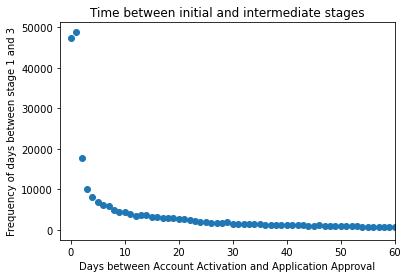

In [ ]:
#pd_df7a[pd_df7a["ed_id"].isin([15, 12, 29, 27, 8, 25, 18, 7, 28])]
plt.scatter(val_counts1a['days'], val_counts1a['count'])
#plt.yscale("log")
plt.xlim(-2, 60)
plt.xlabel("Days between Account Activation and Application Approval")
plt.ylabel("Frequency of days between stage 1 and 3")
plt.title("Time between initial and intermediate stages")
plt.show()
#(pd_df7a[pd_df7a["ed_id"] == 29]["event_timestamp"] - pd_df7a[pd_df7a["ed_id"] == 12]["event_timestamp"]).value_counts().head(25)

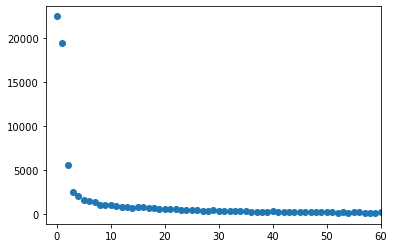

In [ ]:
(pd_df8a[pd_df8a["ed_id"] == 29]["event_timestamp"] - pd_df8a[pd_df8a["ed_id"] == 12]["event_timestamp"]).value_counts().head(25)
val_counts2 = (pd_df8a[pd_df8a["ed_id"] == 29]["event_timestamp"] - pd_df8a[pd_df8a["ed_id"] == 12]["event_timestamp"]).value_counts().reset_index()
val_counts2.columns = ['days', 'count']
val_counts2['days'] = val_counts2['days'].dt.total_seconds() / (24 * 3600)
val_counts2a = val_counts2[val_counts2["days"] >= 0]

plt.scatter(val_counts2a['days'], val_counts2a['count'])
#plt.yscale("log")
plt.xlim(-2, 60)
plt.show()

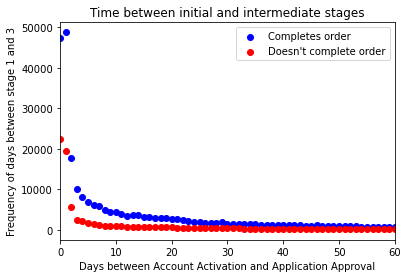

In [ ]:
plt.scatter(val_counts1['days'], val_counts1['count'], color = "blue")
plt.scatter(val_counts2['days'], val_counts2['count'], color = "red")
#plt.yscale("log")
plt.xlim(0, 60)
plt.xlabel("Days between Account Activation and Application Approval")
plt.ylabel("Frequency of days between stage 1 and 3")
plt.title("Time between initial and intermediate stages")
plt.legend(labels = ["Completes order", "Doesn't complete order"])
plt.show()

In [ ]:
sum(val_counts1a["count"])

312255

In [ ]:
sum(val_counts2a["count"])

95916

# Question 4 (Han)

In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import Sequential
from sklearn.preprocessing import OneHotEncoder
import random
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import SimpleRNN, Dense
from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.layers import Masking
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
import  matplotlib.pyplot as plt
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import TimeDistributed
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import math
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional



In [ ]:
df = pd.read_csv("export.csv")
#definition = pd.read_csv("Event Definitions.csv")

In [ ]:
df["event_timestamp"] = pd.to_datetime(df['event_timestamp'], format = 'mixed')


In [ ]:
df = df.sort_values(by=['account_id', 'event_timestamp'])


milestone - predict 5th milestone

milestone 1: 15, 12(web)
milestone 3: 29
milestone 2: 18, 7(web)
milestone 4: 8(web),25
miletone 6: 28
milestone 5: 27

In [ ]:
required_event_ids = [12, 29, 7, 8, 27]

In [ ]:
filtered_df = df[df['ed_id'].isin(required_event_ids)]
filtered_df = filtered_df.loc[filtered_df['ed_id'] != filtered_df['ed_id'].shift()]

In [ ]:
event_counts = filtered_df.groupby('account_id').size()
event_counts.quantile([0.25, 0.5, 0.75])

0.25    1.0
0.50    2.0
0.75    4.0
dtype: float64

In [ ]:
filtered_accounts = event_counts[event_counts < 10]
filtered_df = filtered_df[filtered_df['account_id'].isin(filtered_accounts.index)]


In [ ]:
filtered_df = filtered_df.sort_values(by=['account_id', 'event_timestamp'])


In [ ]:
# create time_elapsed_since_last_event variable with the difference of the current event and the previous event
filtered_df['time_elapsed_since_last_event'] = filtered_df.groupby('account_id')['event_timestamp'].diff()
filtered_df['time_elapsed_since_last_event'] = filtered_df['time_elapsed_since_last_event'].dt.total_seconds() / 60
filtered_df['time_elapsed_since_last_event'].fillna(0, inplace=True)

/var/folders/jg/w3_tpj3s5gvfv0pjjt00kn700000gn/T/ipykernel_33032/2703253810.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  filtered_df['time_elapsed_since_last_event'].fillna(0, inplace=True)


In [ ]:
def remove_outlier(ed_id,df):
    milestone_time = filtered_df[filtered_df['ed_id'] == ed_id]['time_elapsed_since_last_event']
    mean = np.mean(milestone_time)
    std = np.std(milestone_time)
    distance_from_mean = abs(milestone_time - mean)
    not_outlier_mask = distance_from_mean < (2 * std)
    filtered_df[filtered_df['ed_id'] == ed_id] = filtered_df[filtered_df['ed_id'] == ed_id][not_outlier_mask]
    return filtered_df

In [ ]:
filtered_df = remove_outlier(7, filtered_df)
filtered_df = remove_outlier(29, filtered_df)
filtered_df = remove_outlier(8, filtered_df)

In [ ]:
# group the df by account_id and create a set for each account id with its event ids
grouped_2 = filtered_df.groupby('account_id')
grouped = filtered_df.groupby('account_id')['ed_id'].agg(lambda x: set(x))

In [ ]:
# extract the accounts with all the required accounts
accounts_with_all_events = grouped[grouped.apply(lambda x: all(event in x for event in required_event_ids))].index.tolist()

In [ ]:
len(accounts_with_all_events)

92254

In [ ]:
# randomly select 1000 accounts for our modeling
selected_account_ids = random.sample(accounts_with_all_events, 1000)

In [ ]:
# function to create input for the LSTM model
def create_sequence(grouped_data, selected_account_ids, milestone_id):
    # initialize the list to hold time intervals and journey steps
    sequences = []
    Y = []
    # Iterate over each selected account ID
    for account_id in selected_account_ids:
        # Retrieve the group of events corresponding to the current account ID
        group = grouped_data.get_group(account_id)
        # Check if the milestone occurred in this group
        if milestone_id in group['ed_id'].values:
            # Get the index of the occurrence of the milestone
            milestone_index = group[group['ed_id'] == milestone_id].index[0]
            # Get the timestamp of the milestone event
            milestone_time = group.loc[milestone_index, 'event_timestamp']
            # Get all milestones that occurred before the milestone event
            previous_events = group.loc[:milestone_index-1]
            # Ensure that there are events before the milestone
            if not previous_events.empty:
                # Get the prior milestone
                last_event_before = previous_events.iloc[-1]
                # Get the timestamp of the prior milestone
                event_before_time = last_event_before['event_timestamp']
                # Calculate the time elapsed between the last event and the milestone
                time_elapsed = (milestone_time - event_before_time).total_seconds() / 60
                # Extract the sequence of previous events and journey steps
                events = previous_events['ed_id'].tolist()
                journey_steps = previous_events['journey_steps_until_end'].tolist()
                # Calculate time intervals between successive milestones
                time_intervals = (previous_events['event_timestamp'].diff().dt.total_seconds() / 60).fillna(0).tolist()
                # Create a sequence with journey steps with their corresponding time intervals
                sequence = list(zip(journey_steps, time_intervals))
                # Append the sequence and time elapsed to lists
                sequences.append(sequence)
                Y.append(time_elapsed)
    # Convert the list of time elapsed into a NumPy array
    Y= np.array(Y)
    # Return the list of sequences and the array of time elapsed values
    return sequences, Y

In [ ]:
class AverageBaseModel:

    def fit(self, X_train):
        # The fit method calculates the mean across each row of the training set.
        # It stores the average values.
        self.average = np.mean(X_train, axis=1)

    def predict(self, X_test):
        # The predict method uses the average time from the training set to make predictions.
        # It creates an array filled with the mean value from the training set's average,
        # We only use the first feature, which is time_elapsed for all predictions
        return np.full((X_test.shape[0],), np.mean(self.average[:, 0]) )

    def evaluate(self, X_test, Y_test):
        # The evaluate method calculates the model's mean squared error on the test set.
        # It calls the predict method to get the model's predictions for the test set,
        # then computes the MSE by comparing the predicted values against the actual values.
        predictions = self.predict(X_test)
        mse = np.mean((predictions - Y_test) ** 2)
        return mse

In [ ]:
# funtion that apply the specific trainformation to training and testing sets
def transformation(X_train, Y_train, X_test, Y_test, form):
    # If the tranformtation is 'log', apply a log transformation to the input data.
    if form == 'log':
        Y_train_transformed = np.log(Y_train + 1)
        Y_test_transformed = np.log(Y_test + 1)
        X_train_transformed = np.log(X_train + 1)
        X_test_transformed = np.log(X_test + 1)
    # If the tranformtation is 'standard', standardize the features by removing the mean and scaling to unit variance.
    if form == 'standard':
        scaler = StandardScaler()
        Y_train_transformed = scaler.fit_transform(Y_train.reshape(-1, 1))
        Y_test_transformed = scaler.fit_transform(Y_test.reshape(-1, 1))
        X_train_transformed = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1]))
        X_train_transformed = X_train_transformed.reshape(X_train.shape)
        X_test_transformed = scaler.fit_transform(X_test.reshape(-1, X_test.shape[-1]))
        X_test_transformed = X_test_transformed.reshape(X_test.shape)
    # Return the transformed training and testing sets.
    return Y_train_transformed, Y_test_transformed, X_train_transformed, X_test_transformed


In [ ]:
def plot_actual_predicted(num, actual, predicted, predicted_base):
     # This function creates a plot to visualize the actual vs predicted time until the next event.
    plt.figure(figsize=(5,5))
    plt.plot(actual, label = 'actual')
    plt.plot(predicted, color = 'pink', label = 'lstm prediction')
    plt.plot(predicted_base, color = 'lightgreen', label = 'base prediction')
    plt.legend()
    plt.xlabel('Accounts')
    plt.ylabel('Time Until Next Event (log)')
    plt.title(f'Actual vs. LSTM Predicted Time Until Next Event for Milestone {num}')
    plt.show()


In [ ]:
def build_lstm(sequence_length, num_features):
    # This function constructs an LSTM model
    # It defines a Sequential model with an LSTM layer followed by a Dense layer for output.
    # The LSTM layer has 50 units and is configured to return the single final output
    # The `input_shape` parameter is set according to the provided `sequence_length` and `num_features`,
    # which represent the dimensions of the input data.
        model = Sequential([
                LSTM(units=50, return_sequences=False, input_shape=(sequence_length, num_features)),
                Dense(units=1)
        ])
        # Define the optimizer for the model training process.
        optimizer = Adam(learning_rate=0.001)
        # Compile the model with the Mean Squared Error loss function,
        model.compile(optimizer=optimizer, loss='mean_squared_error')
        # Print the model summary
        model.summary()
        # Return the compiled model
        return model

In [ ]:
def predict(sequences, Y, num):
    # This function trains LSTM and base average models and evaluates their predictions against actual data.
    # Pad sequences to ensure they all have the same length for LSTM input requirements.
    padded_sequences = pad_sequences(sequences, padding='post', dtype='float32')

    # Determine the length of sequences and the number of features from the padded data.
    sequence_length = padded_sequences[0].shape[0]
    num_features = padded_sequences[0].shape[1]

     # Split the padded sequence data and the targets (Y) into training and testing sets.
    X_train, X_test, Y_train, Y_test = train_test_split(padded_sequences, Y, test_size=0.2, random_state=42)

    # Transform both X and Y data into their log form
    Y_train_log, Y_test_log, X_train_log, X_test_log = transformation(X_train, Y_train, X_test, Y_test, form = 'log')
    # Build the LSTM model
    model = build_lstm(sequence_length, num_features)

    # Train the LSTM model
    history = model.fit(X_train_log, Y_train_log, epochs=100, batch_size=30,verbose=1)

    # Evaluate the LSTM using the test data
    test_loss = model.evaluate(X_test_log, Y_test_log)

    # Predict the test data using the LSTM model
    prediction_log = model.predict(X_test_log)

    # Instantiate the base averge model which predicts based on the average
    model_base = AverageBaseModel()

    # Train the average model
    history_base = model_base.fit(X_train_log)

    # Evaluate the trained average model using the test data.
    test_loss_base = model_base.evaluate(X_test_log, Y_test_log)

    # Predict the test data using the average model
    prediction_log_base = model_base.predict(X_test_log)

    # Plot the actual vs predicted values for the LSTM and average model predictions.
    plot_actual_predicted(num, Y_test_log, prediction_log, prediction_log_base)

    # Print the test losses for both the LSTM and the average model to compare their performance.
    print(f"LSTM Model Loss: {test_loss}")
    print(f"Base Model Loss: {test_loss_base}")

prediction for milestone 3

/Users/qianghan/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,651 (41.61 KB)

 Trainable params: 10,651 (41.61 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 63.8921   
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 54.8545 
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 47.6050 
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 32.7441 
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 22.2043 
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11.3015
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - loss: 7.0294
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.2471 
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.8256 
Epoch 10/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.3421 
Epoch 11/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.0015 
Epoch 12/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - loss: 2.6208
Epoch 13/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.5868 
Epoch 14/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.5036 
Epoch 15/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/s

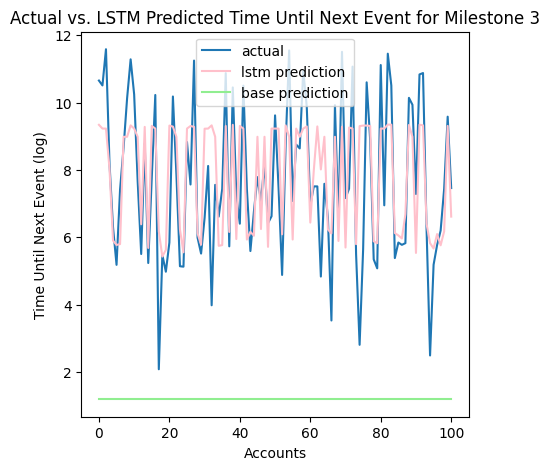

LSTM Model Loss: 2.3598647117614746
Base Model Loss: 46.53315032163119


In [ ]:
sequences_3, Y_3 = create_sequence(grouped_2, selected_account_ids, milestone_id = 29)
# prediction for milestone 3
predict(sequences_3, Y_3, 3)

prediction for milestone 4

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 50)             │        10,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,651 (41.61 KB)

 Trainable params: 10,651 (41.61 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 17.5215   
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 14.1522 
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11.0304
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.5056 
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.1900
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.8763 
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.1857 
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.1717 
Epoch 9/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.0234 
Epoch 10/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.6357 
Epoch 11/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.2363 
Epoch 12/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.2593 
Epoch 13/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.9025 
Epoch 14/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.0582 
Epoch 15/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - 

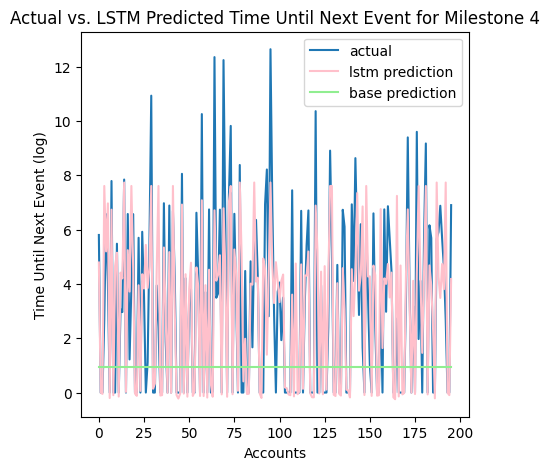

LSTM Model Loss: 4.970486164093018
Base Model Loss: 15.363929063173053


In [ ]:
sequences_4, Y_4 = create_sequence(grouped_2, selected_account_ids, milestone_id = 7)
# prediction for milestone 4
predict(sequences_4, Y_4, 4)

prediction for milestone 5

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 50)             │        10,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,651 (41.61 KB)

 Trainable params: 10,651 (41.61 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 47.4611   
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11.2888 
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7872 
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7238 
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6446 
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7155 
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6796 
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7458 
Epoch 9/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7253 
Epoch 10/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6638 
Epoch 11/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7053 
Epoch 12/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7236 
Epoch 13/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6728 
Epoch 14/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7139 
Epoch 15/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step -

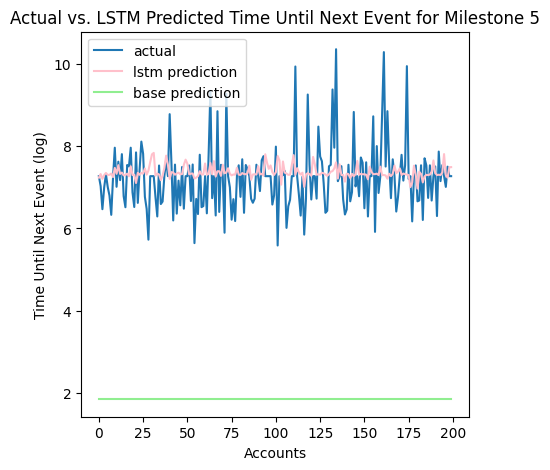

LSTM Model Loss: 0.579894483089447
Base Model Loss: 29.646004859024952


In [ ]:
sequences_5, Y_5 = create_sequence(grouped_2, selected_account_ids, milestone_id = 27)
predict(sequences_5, Y_5, 5)